In [1]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import bbknn

In [2]:
import sys
sys.path.insert(0, "../lib")
import sankey
import sc_utils

In [3]:
mpl.rcParams["figure.figsize"] = (16, 12)

Read 02obj

This one is derived from 01obj by filtering out high-mito cells in clusters 2 & 7

In [5]:
ds = sc.read_h5ad("../data/02preprint/02obj-noribo.h5ad")

In [5]:
ds.shape

(40439, 20128)

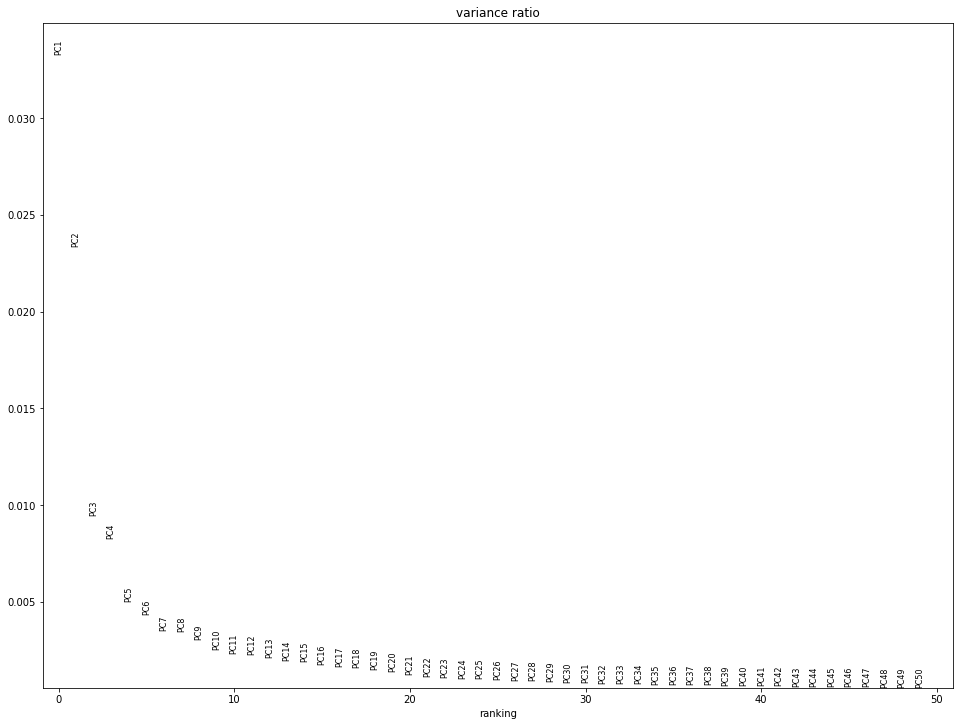

In [6]:
sc.pl.pca_variance_ratio(ds, n_pcs=50)

Adjust integration: p_pcs = `20` instead of `30`, neighbors_within_batch = `100 / n` instead of `75 / n`

In [7]:
bbknn.bbknn(ds, neighbors_within_batch=int(100 / ds.obs.batch.unique().size), n_pcs=20)

Rerun clustering & Umap

In [8]:
sc.tl.leiden(ds, resolution=0.75)

In [9]:
sc.tl.umap(ds)

Examine

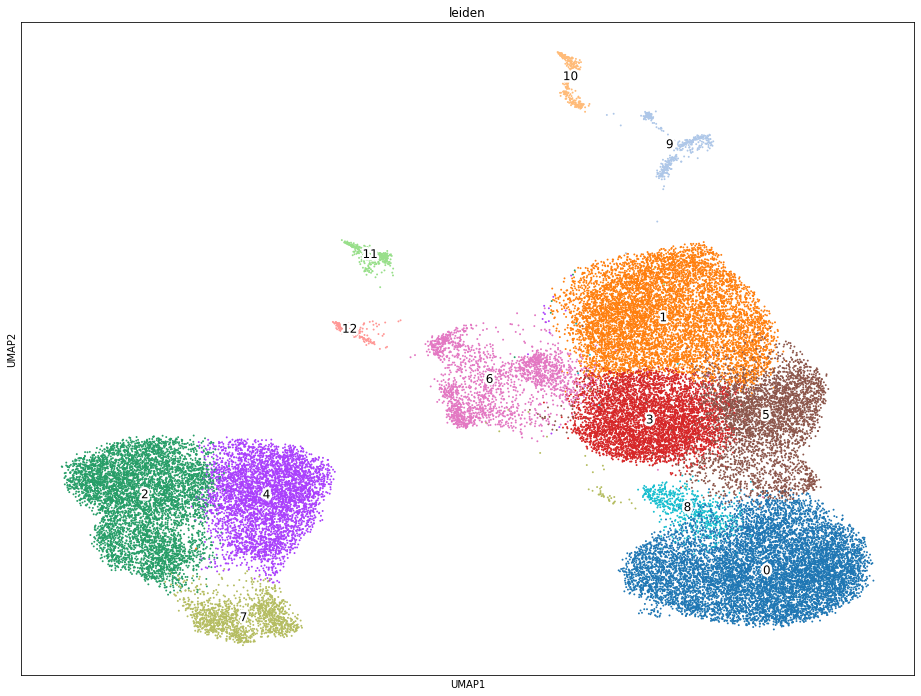

In [10]:
ax = sc.pl.umap(
    ds, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

Percentage of Mitochondrial genes

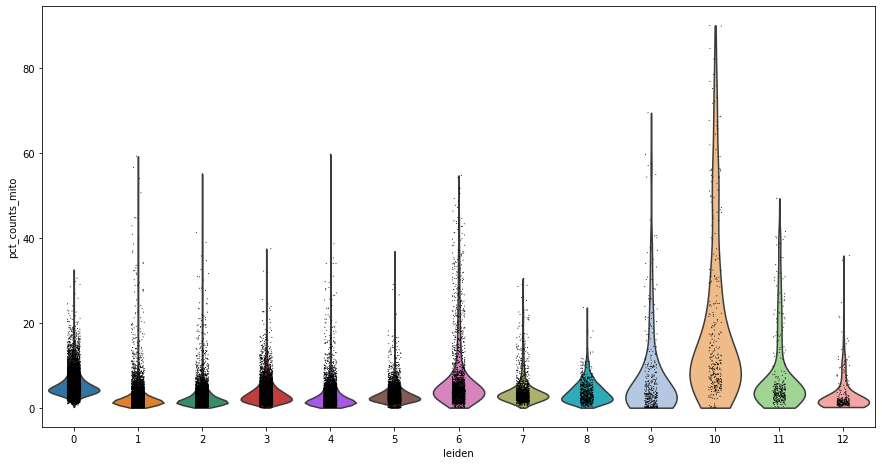

In [49]:
sc.pl.violin(ds, "pct_counts_mito", groupby="leiden")

Macrophage markers across clusters

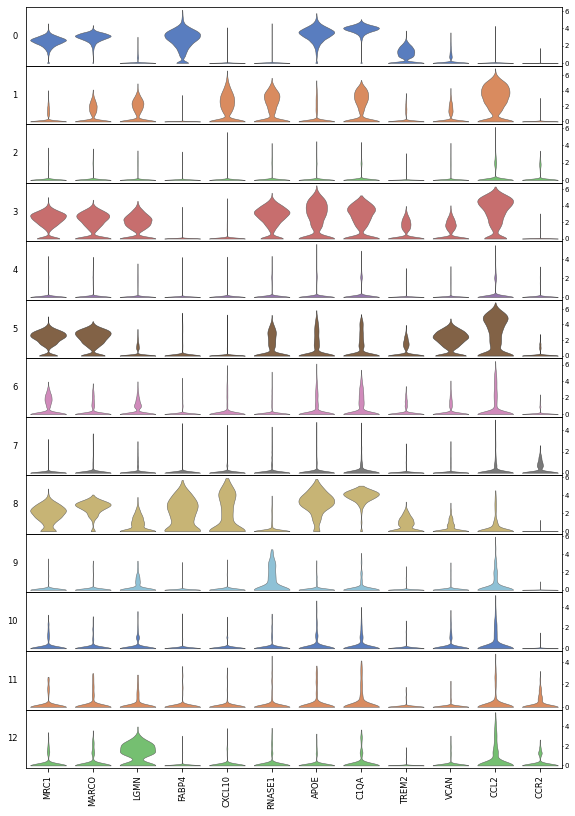

In [50]:
markers = [
    "MRC1", "MARCO", "LGMN", "FABP4", "CXCL10", "RNASE1", "APOE", "C1QA", "TREM2", "VCAN", "CCL2", "CCR2"
]
ax = sc.pl.stacked_violin(
    ds,
    markers,
    groupby="leiden",
    rotation=90,
    figsize=(10, 14),
    show=False
);

Seems good, proceed

Compute markers and show top 5 for clusters

In [56]:
sc.tl.rank_genes_groups(ds, "leiden", method="wilcoxon", n_genes=0)
new_markers = sc_utils.get_markers(ds, "leiden")

In [58]:
pd.set_option('display.max_rows', None)
new_markers.groupby("cluster").head(5)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   5.129370  0.997591  0.323825   0.000000e+00       0   
1        0.000000e+00   3.357414  0.996605  0.456607   0.000000e+00       0   
2        0.000000e+00   4.811596  0.985326  0.221356   0.000000e+00       0   
3        0.000000e+00   4.341185  0.987516  0.231993   0.000000e+00       0   
4        0.000000e+00   4.666231  0.972076  0.160731   0.000000e+00       0   
20128    0.000000e+00   4.387151  0.926809  0.262341   0.000000e+00       1   
20129    0.000000e+00   3.388625  0.981055  0.418464   0.000000e+00       1   
20130    0.000000e+00   2.555198  0.951751  0.451453   0.000000e+00       1   
20131    0.000000e+00   3.472460  0.944800  0.396623   0.000000e+00       1   
20132    0.000000e+00   3.256429  0.919449  0.396502   0.000000e+00       1   
40256    0.000000e+00   4.900088  0.929565  0.204545   0.000000e+00       2   
40257    0.000000e+00   4.183490  0.837471  0.161968   0.000000e+00       2   
40258    0.000000e+00   4.161289  0.794154  0.160299   0.000000e+00       2   
40259    0.000000e+00   2.663938  0.875858  0.410012   0.000000e+00       2   
40260    0.000000e+00   4.782779  0.690967  0.140909   0.000000e+00       2   
60384    0.000000e+00   3.048967  0.944669  0.482374   0.000000e+00       3   
60385    0.000000e+00   3.036931  0.943659  0.395412   0.000000e+00       3   
60386    0.000000e+00   2.321878  0.966074  0.536309   0.000000e+00       3   
60387    0.000000e+00   2.610172  0.895396  0.431764   0.000000e+00       3   
60388    0.000000e+00   3.839957  0.849354  0.220165   0.000000e+00       3   
80512    0.000000e+00   6.476066  0.974246  0.164439   0.000000e+00       4   
80513    0.000000e+00   5.134468  0.890719  0.226632   0.000000e+00       4   
80514    0.000000e+00   5.104774  0.829234  0.125550   0.000000e+00       4   
80515    0.000000e+00   4.568011  0.938979  0.230895   0.000000e+00       4   
80516    0.000000e+00   6.233304  0.754524  0.044424   0.000000e+00       4   
100640   0.000000e+00   1.253832  0.932346  0.568227   0.000000e+00       5   
100641   0.000000e+00   3.671632  0.815208  0.232407   0.000000e+00       5   
100642   0.000000e+00   1.344211  0.933184  0.574955   0.000000e+00       5   
100643   0.000000e+00   3.077183  0.868046  0.424991   0.000000e+00       5   
100644   0.000000e+00   2.324844  0.892927  0.481037   0.000000e+00       5   
120768   0.000000e+00   3.778883  0.713729  0.218497   0.000000e+00       6   
120769   0.000000e+00   2.409541  0.835443  0.561678   0.000000e+00       6   
120770   0.000000e+00   1.918912  0.852483  0.546880   0.000000e+00       6   
120771   0.000000e+00   2.377485  0.868062  0.566523   0.000000e+00       6   
120772   0.000000e+00   3.308823  0.741480  0.375850   0.000000e+00       6   
140896   0.000000e+00   7.814292  0.929568  0.016331   0.000000e+00       7   
140897   0.000000e+00   4.449426  0.975593  0.273914   0.000000e+00       7   
140898   0.000000e+00   4.723120  0.951883  0.275452   0.000000e+00       7   
140899   0.000000e+00   2.510619  0.982566  0.578028   0.000000e+00       7   
140900   0.000000e+00   7.588247  0.886332  0.016306   0.000000e+00       7   
161024  1.602505e-221   4.323411  0.859594  0.235288  1.602505e-221       8   
161025  2.555072e-214   3.705891  0.939158  0.449822  2.555072e-214       8   
161026  2.813567e-181   2.410076  0.982839  0.495929  2.813567e-181       8   
161027  9.948916e-173   3.598386  0.989080  0.424871  9.948916e-173       8   
161028  2.408388e-169   2.679882  0.882995  0.409292  2.408388e-169       8   
181152  3.162663e-142   8.427398  0.752500  0.018757  3.162663e-142       9   
181153  5.589445e-117   7.887444  0.685000  0.018357  5.589445e-117       9   
181154  1.394336e-114   9.288883  0.672500  0.007193  1.394336e-114       9   
181155  2.314212e-105  11.078057  0.642500  0.001998  2.314212e-105       9   
181156   9.547502e-86   7.443891  0.585000  0.007268   9.547502e-8

Naming clusters

In [11]:
cluster_names = pd.Series([
    "TRAM",
    "MoM_1, CXCL10",
    "CD4 T cells",
    "MoM_2, RNASE1",
    "CD8 T cells",
    "MoM_3, VCAN",
    "DCs",
    "Prolif. T cells",
    "TRAM, inf.",
    "Club, AT2 cells",
    "Ciliated cells",
    "Plasma, B cells",
    "pDCs"
])

In [12]:
ds.obs["cluster"] = cluster_names[ds.obs.leiden.astype(int)].values

... storing 'cluster' as categorical


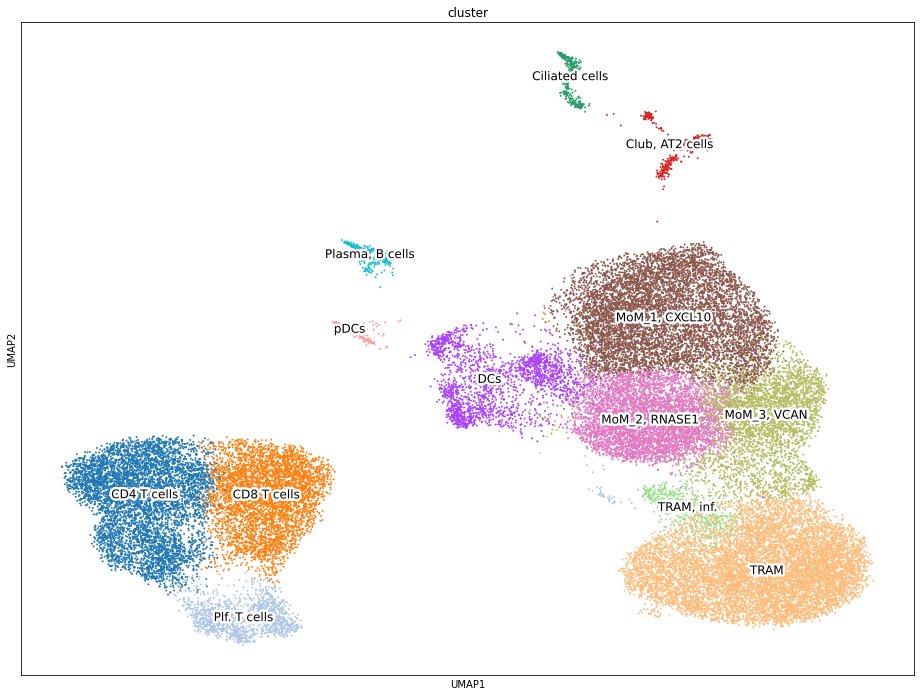

In [13]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

Dendrogram!

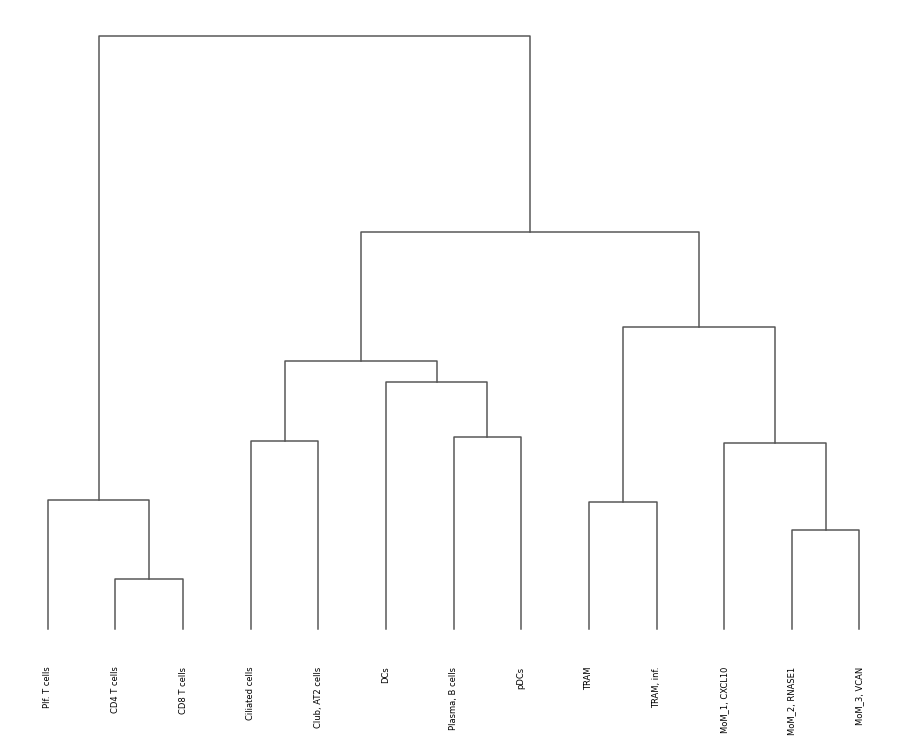

In [145]:
sc.tl.dendrogram(ds, groupby="cluster")
sc.pl.dendrogram(ds, groupby="cluster")

In [14]:
ds.obs.patient = ds.obs.patient.astype("category")

By patient

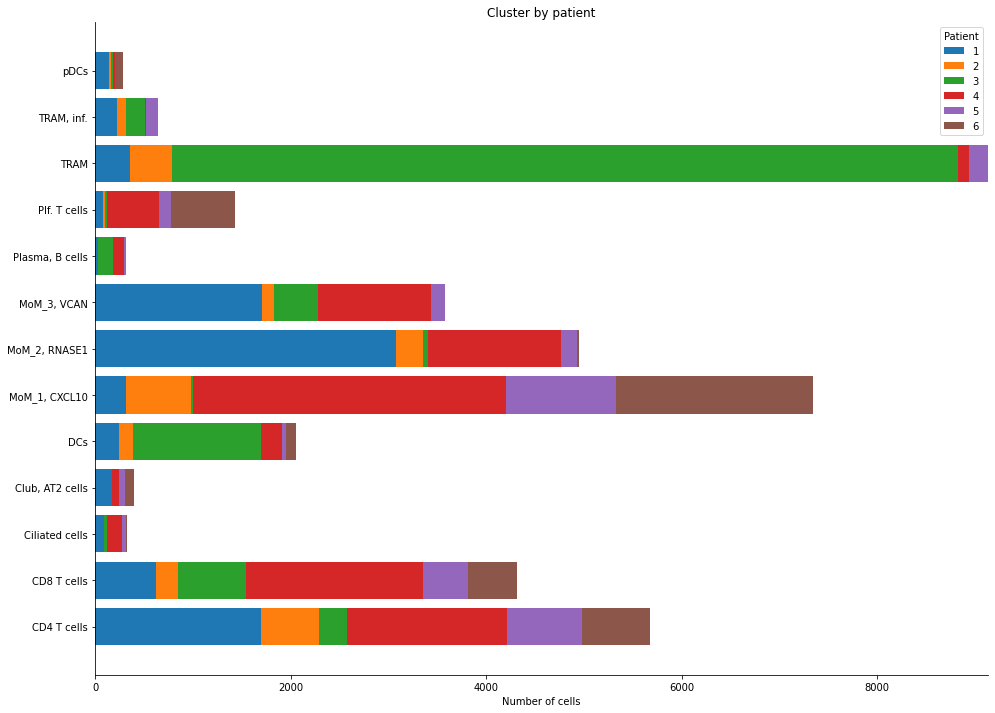

In [15]:
ax = sc_utils.plot_composition(ds, "cluster", "patient")
ax.set_xlabel("Number of cells")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.figure.canvas.draw()
#ax.figure.set_size_inches((4, 8))
#ax.set_xticklabels(ax.get_xticklabels(), rotation="45", ha="right");

Add Number of SARS genes meta field

In [81]:
sars_detected = (ds.raw.X[:, ds.var_names.isin(sars_genes)].todense() > 0).sum(axis=1).A[:, 0]

In [82]:
ds.obs["n_sars_genes"] = sars_detected

## Doublets

Manually set thresholds based on scrublet histograms

In [53]:
dbl_thresholds = {
    "Sample_1": 0.22,
    "Sample_2": 0.24,
    "Sample_3": 0.22,
    "Sample_4": 0.22,
    "Sample_5": 0.3,
    "Sample_6": 0.32,
    "Sample_7": 0.32,
    "Sample_8": 0.4,
    "Sample_9": 0.4
}

Load all doublet scores and select doublet barcodes

In [63]:
doublets = []
for sample, threshold in dbl_thresholds.items():
    batch_num = ds.obs.batch.loc[ds.obs["orig.ident"] == sample].values[0]
    scores = pd.read_csv(f"../data/02preprint/doublets/{sample}_doublets.csv", index_col=0)
    sample_doublets = sample + "_" + scores["0"].loc[scores.doublet > threshold].str.replace("\d+$", "") + batch_num
    doublets.append(sample_doublets)
    print(f"{sample} has {sample_doublets.size}")
doublets = pd.concat(doublets)
doublets.shape

Sample_1 has 229
Sample_2 has 208
Sample_3 has 227
Sample_4 has 219
Sample_5 has 107
Sample_6 has 95
Sample_7 has 27
Sample_8 has 28
Sample_9 has 32


(1172,)

In [66]:
ds.obs["doublet"] = False
ds.obs.doublet[ds.obs_names.isin(doublets)] = True
ds.obs.doublet.value_counts()b

/projects/b1038/Pulmonary/nmarkov/script/2020_Grant/single_cell_analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    39382
True      1057
Name: doublet, dtype: int64

In [67]:
ds.obs.doublet = ds.obs.doublet.astype("category")

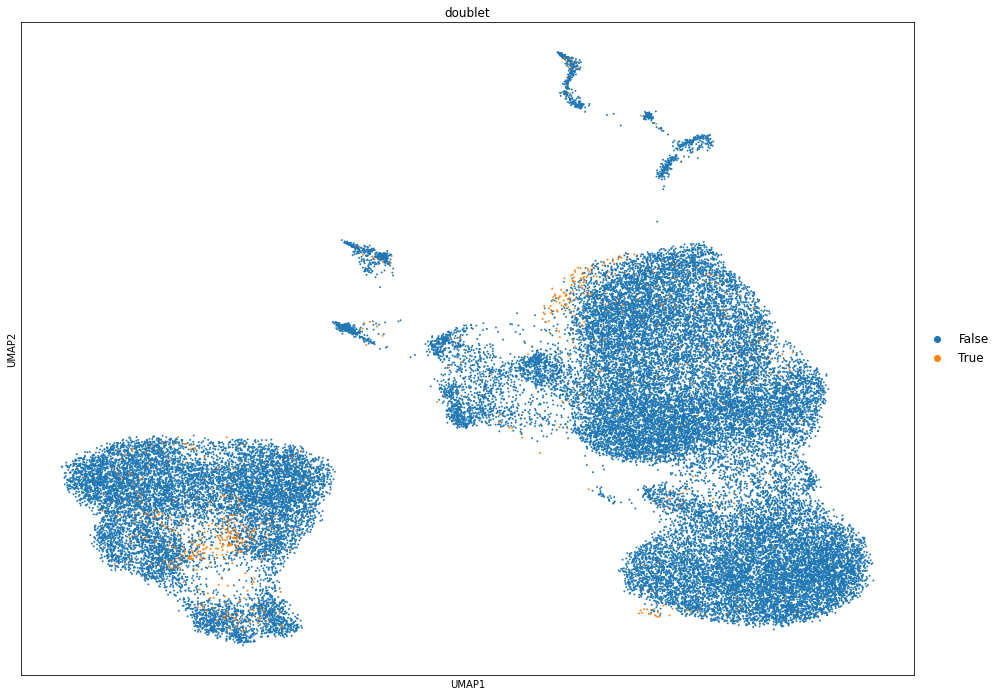

In [69]:
ax = sc.pl.umap(
    ds, 
    color="doublet", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap="YlOrRd"
)

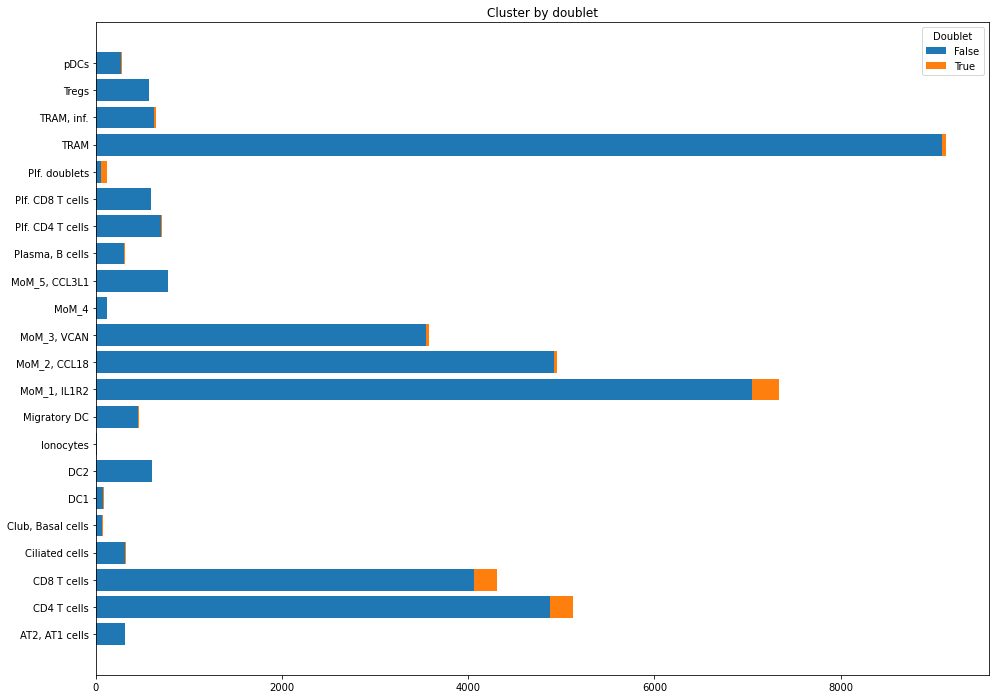

In [71]:
sc_utils.plot_composition(ds, "cluster", "doublet")

In [73]:
doublets_only = ds[ds.obs.doublet == True, :].copy()

This is how doublet cells are distributed by patients

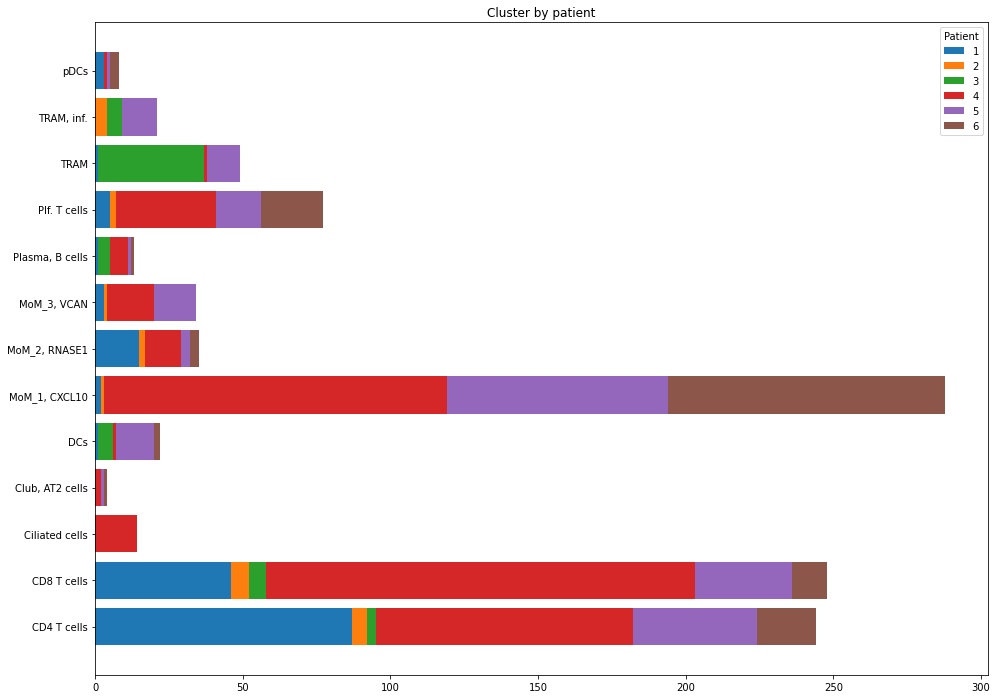

In [74]:
sc_utils.plot_composition(doublets_only, "cluster", "patient")

## Subclustering DCs

In [149]:
dcs = ds[ds.obs.cluster == "DCs", :].copy()

In [150]:
dcs = dcs.raw.to_adata()

In [151]:
sc.pp.highly_variable_genes(dcs, n_top_genes=1000, batch_key="orig.ident")

In [152]:
dcs.var.highly_variable[dcs.var_names.str.match("^SARS-CoV-2")] = False

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
dcs.var.highly_variable.sum()

991

In [154]:
dcs.raw = dcs

In [155]:
sc.pp.scale(dcs)
sc.tl.pca(dcs, svd_solver="arpack")

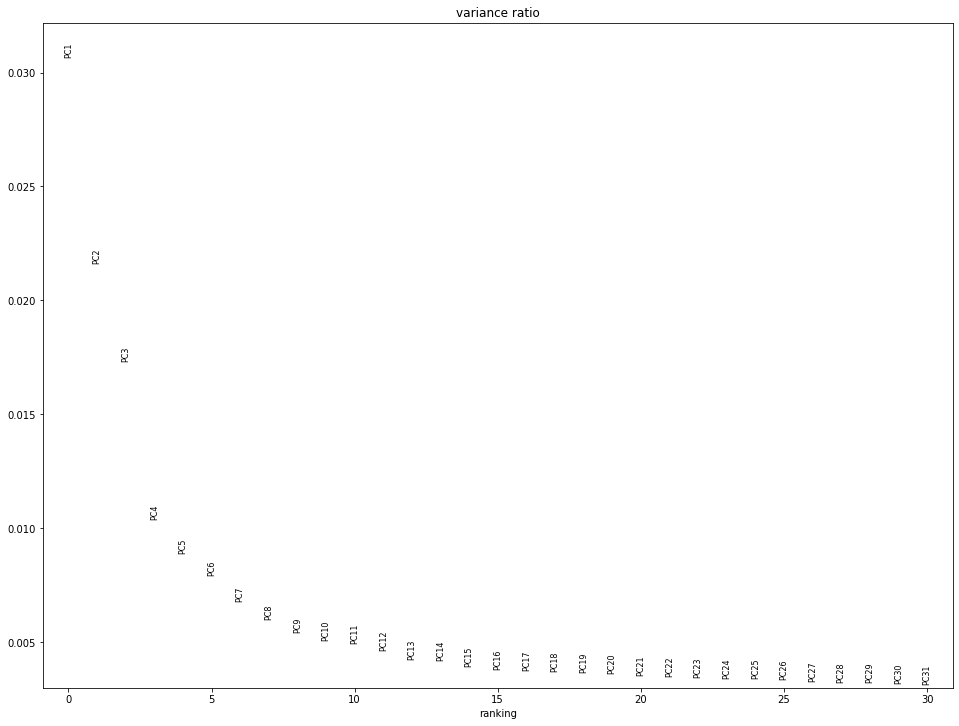

In [156]:
sc.pl.pca_variance_ratio(dcs)

In [157]:
bbknn.bbknn(dcs, neighbors_within_batch=int(50 / dcs.obs.batch.unique().size), n_pcs=10)

In [164]:
sc.tl.leiden(dcs, resolution=0.4)

In [165]:
sc.tl.umap(dcs)

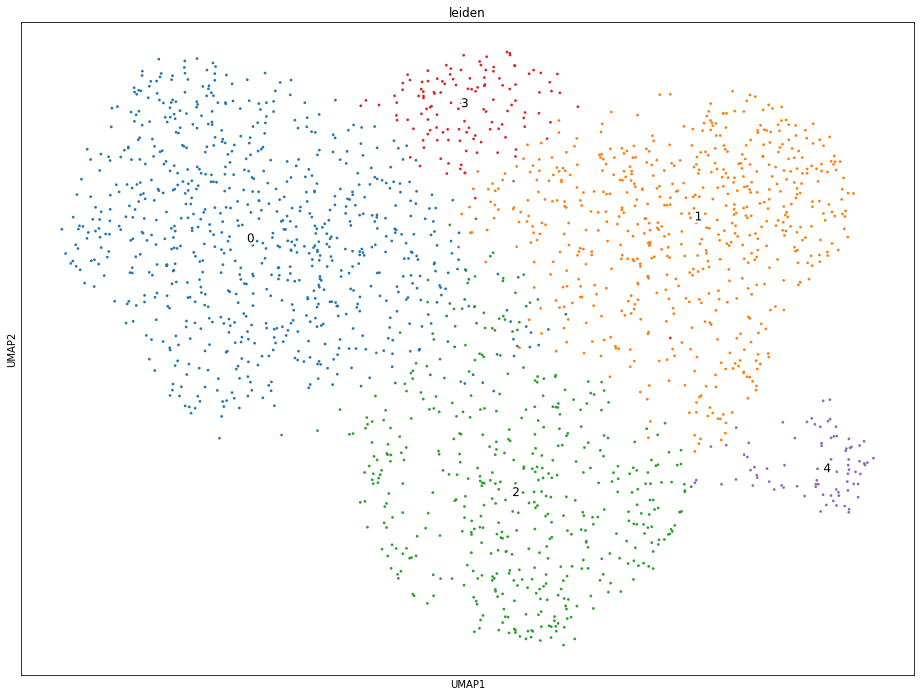

In [166]:
ax = sc.pl.umap(
    dcs, 
    color="leiden", 
    size=30, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

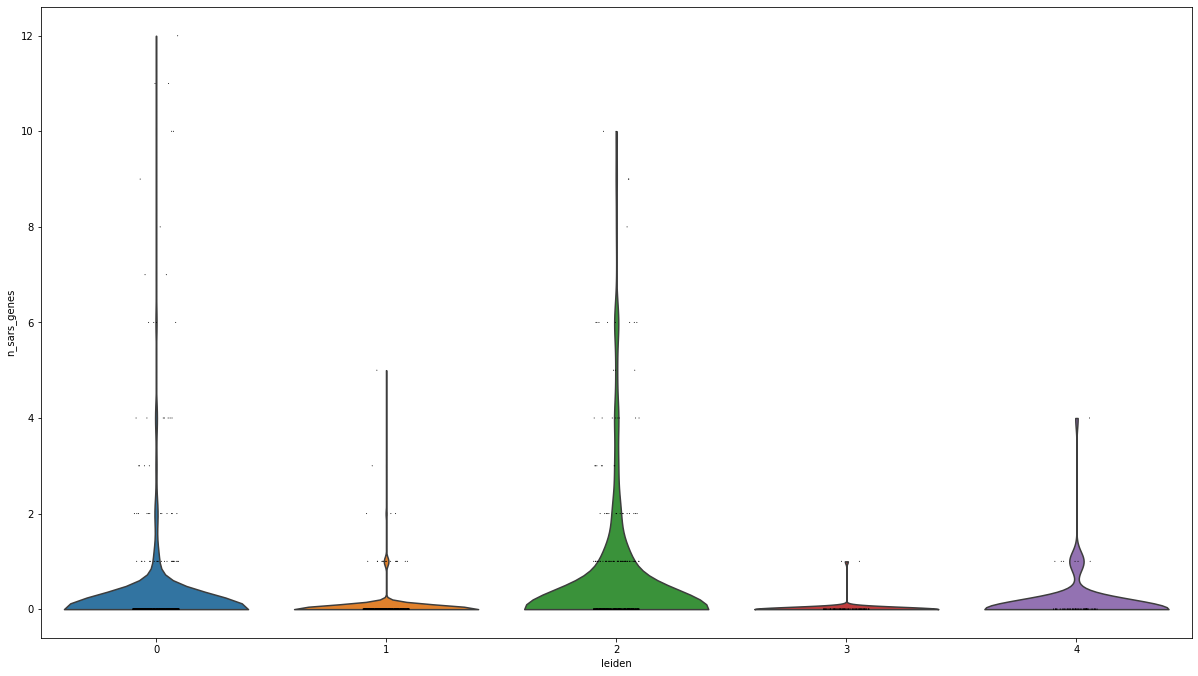

In [176]:
sc.pl.violin(dcs, ["n_sars_genes"], groupby="leiden")

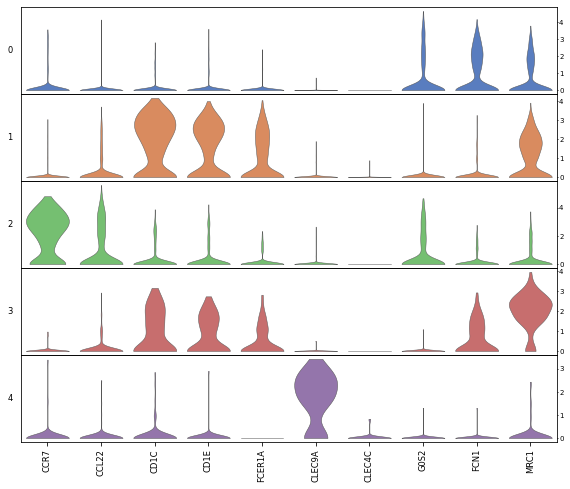

In [168]:
markers = [
    "CCR7", "CCL22", "CD1C", "CD1E", "FCER1A", "CLEC9A", "CLEC4C", "G0S2", "FCN1", "MRC1"
]
ax = sc.pl.stacked_violin(
    dcs,
    markers,
    groupby="leiden",
    rotation=90,
    figsize=(10, 8),
    show=False
);

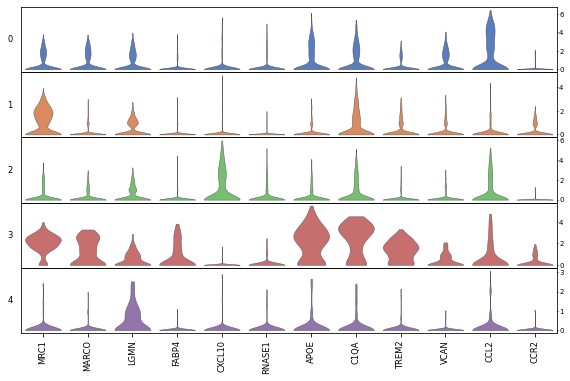

In [173]:
markers = [
    "MRC1", "MARCO", "LGMN", "FABP4", "CXCL10", "RNASE1", "APOE", "C1QA", "TREM2", "VCAN", "CCL2", "CCR2"
]
ax = sc.pl.stacked_violin(
    dcs,
    markers,
    groupby="leiden",
    rotation=90,
    figsize=(10, 6),
    show=False
);

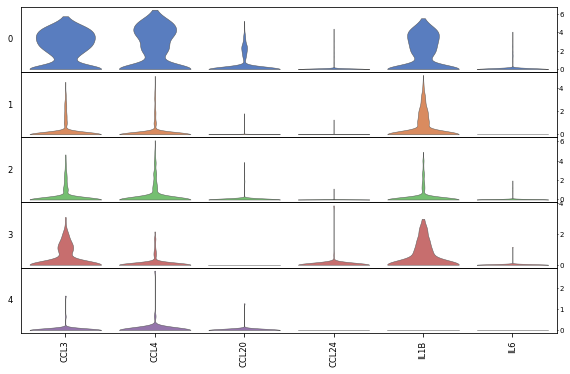

In [178]:
clusters = pd.Series(ds.obs.cluster.unique().astype(str))
clusters = clusters[clusters.str.match("^MoM|TRAM")]

markers = [
    "CCL3", "CCL4", "CCL20", "CCL24", "IL1B", "IL6"
]
ax = sc.pl.stacked_violin(
    dcs,
    markers,
    groupby="leiden",
    rotation=90,
    figsize=(10, 6),
    show=False
);

In [169]:
sc.tl.rank_genes_groups(dcs, "leiden", method="wilcoxon", n_genes=0)
dcs_markers = sc_utils.get_markers(dcs, "leiden")

In [170]:
dcs_markers.groupby("cluster").head(8)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0      6.784950e-163   3.729583  0.830749  0.182031  6.784950e-163       0   
1      3.963129e-126   2.669473  0.812661  0.322656  3.963129e-126       0   
2      4.033297e-122   4.636652  0.689922  0.123438  4.033297e-122       0   
3      3.672957e-120   1.626088  0.844961  0.339062  3.672957e-120       0   
4      1.337705e-112   1.519587  0.794574  0.346094  1.337705e-112       0   
5      1.112381e-105   2.084584  0.793282  0.341406  1.112381e-105       0   
6      7.772932e-101   1.693708  0.828165  0.401562  7.772932e-101       0   
7       2.595493e-98   1.473316  0.802326  0.431250   2.595493e-98       0   
20128  1.321929e-138   2.797681  0.871499  0.373877  1.321929e-138       1   
20129  3.760569e-110   2.822582  0.914333  0.436766  3.760569e-110       1   
20130  3.760569e-110   2.129649  0.899506  0.471320  3.760569e-110       1   
20131  2.390561e-108   2.834147  0.808896  0.249482  2.390561e-108       1   
20132  3.805664e-106   4.123298  0.711697  0.138217  3.805664e-106       1   
20133  2.007037e-105   2.190092  0.911038  0.462336  2.007037e-105       1   
20134  2.496659e-104   2.739672  0.830313  0.330339  2.496659e-104       1   
20135  2.694741e-104   2.058086  0.884679  0.465791  2.694741e-104       1   
40256  1.256816e-123   4.765424  0.814655  0.168553  1.256816e-123       2   
40257  1.051076e-115   6.006423  0.743534  0.055975  1.051076e-115       2   
40258  2.616742e-105   4.244465  0.756466  0.155975  2.616742e-105       2   
40259   2.435831e-70   1.843557  0.842672  0.432704   2.435831e-70       2   
40260   1.871918e-66   2.266248  0.786638  0.404403   1.871918e-66       2   
40261   2.028846e-66   4.994404  0.581897  0.062893   2.028846e-66       2   
40262   2.733009e-65   2.809736  0.687500  0.237107   2.733009e-65       2   
40263   6.849116e-65   1.281384  0.784483  0.370440   6.849116e-65       2   
60384   2.404652e-37   2.264308  0.952000  0.525143   2.404652e-37       3   
60385   7.053598e-36   2.760276  0.920000  0.397097   7.053598e-36       3   
60386   3.179611e-32   1.623737  0.968000  0.601348   3.179611e-32       3   
60387   1.302515e-29   2.210702  0.936000  0.553136   1.302515e-29       3   
60388   1.766051e-29   2.788621  0.864000  0.343701   1.766051e-29       3   
60389   3.029271e-29   2.687894  0.880000  0.358735   3.029271e-29       3   
60390   3.029271e-29   3.102713  0.800000  0.177812   3.029271e-29       3   
60391   1.422266e-28   2.384873  0.896000  0.394505   1.422266e-28       3   
80512   7.231351e-28   7.993350  0.761905  0.016244   7.231351e-28       4   
80513   2.331529e-26   4.506518  0.797619  0.127919   2.331529e-26       4   
80514   6.874307e-26   3.513155  0.833333  0.342640   6.874307e-26       4   
80515   2.081922e-25   3.599333  0.833333  0.279695   2.081922e-25       4   
80516   1.062904e-22   4.247830  0.750000  0.197462   1.062904e-22       4   
80517   6.859881e-22   4.130562  0.738095  0.153299   6.859881e-22       4   
80518   7.423883e-22   2.493698  0.833333  0.571066   7.423883e-22       4   
80519   7.426658e-21   3.107430  0.797619  0.427919   7.426658e-21       4   

           gene  
0          SOD2  
1         PLAUR  
2          CCL3  
3           FTL  
4          FTH1  
5        NFKBIA  
6          CTSB  
7          PSAP  
20128     YWHAH  
20129  HLA-DQA1  
20130  HLA-DPA1  
20131      JAML  
20132      CD1C  
20133  HLA-DQB1  
20134   ALOX5AP  
20135   ARHGDIB  
40256     BIRC3  
40257      CCR7  
40258     LAMP3  
40259       REL  
40260    CDKN1A  
40261      IDO1  
40262     DAPP1  
40263    MALAT1  
60384      TSPO  
60385      ACP5  
60386       GRN  
60387       LYZ  
60388      FBP1  
60389      MRC1  
60390     TREM2  
60391     LTA4H  
80512    CLEC9A  
80513     WDFY4  
80514      NAAA  
80515      IRF8  
80516     CPNE3  
80517   C1orf54  
80518      SNX3  
80519      CPVL

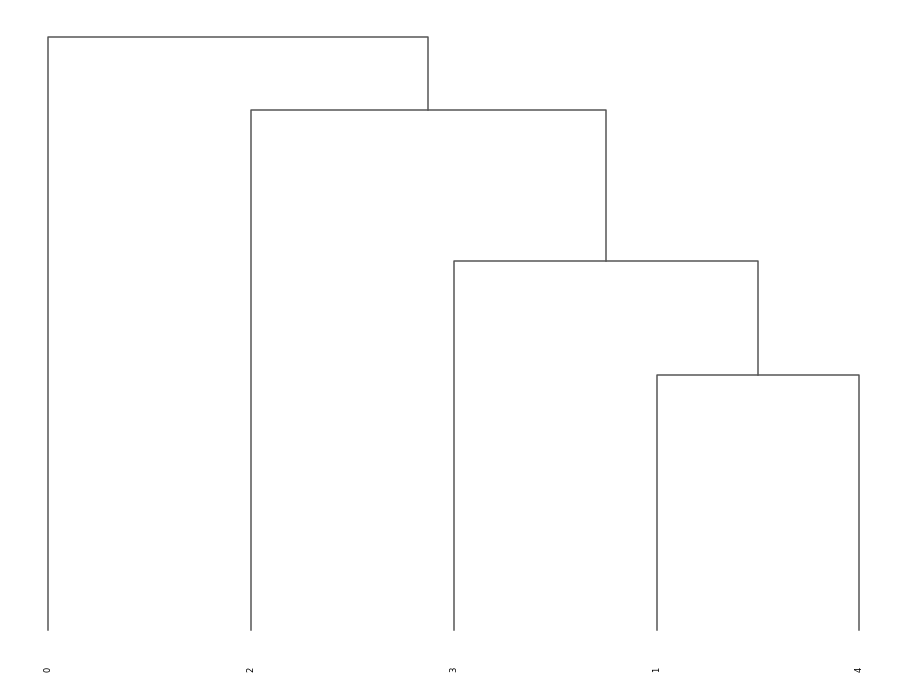

In [171]:
sc.tl.dendrogram(dcs, groupby="leiden")
sc.pl.dendrogram(dcs, groupby="leiden")

Name them…

In [179]:
dcs_names = pd.Series([
    "MoM_5",
    "DC2",
    "Migratory DC",
    "MoM_4",
    "DC1"
])

In [180]:
dcs.obs["cluster"] = dcs_names[dcs.obs.leiden.astype(int)].values

In [182]:
ds.obs.cluster = ds.obs.cluster.astype(str)

In [183]:
ds.obs.loc[dcs.obs_names, "cluster"] = dcs.obs.cluster

## Look at big picture after subclustering

... storing 'cluster' as categorical


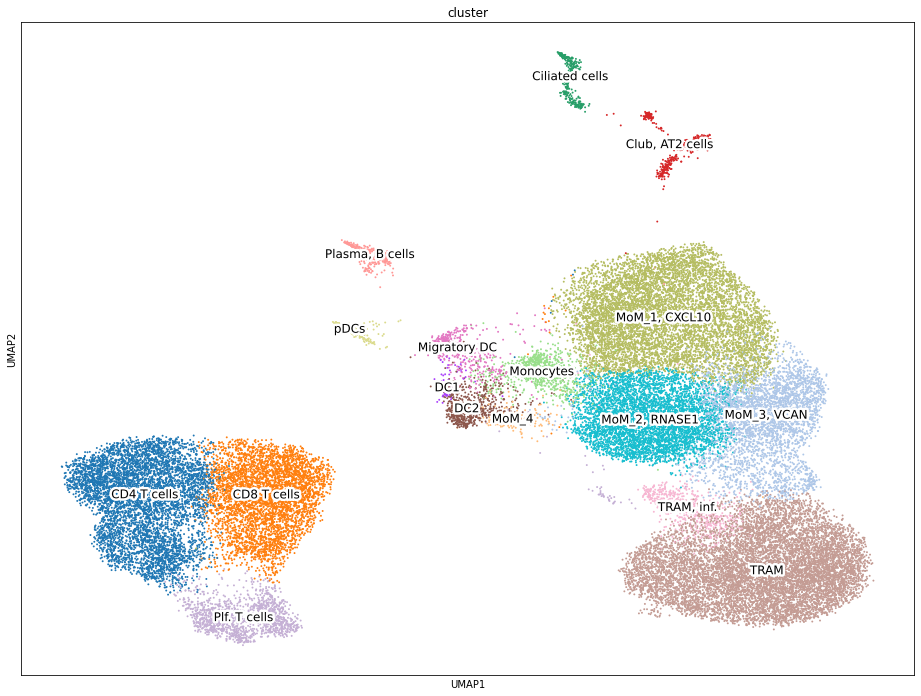

In [184]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

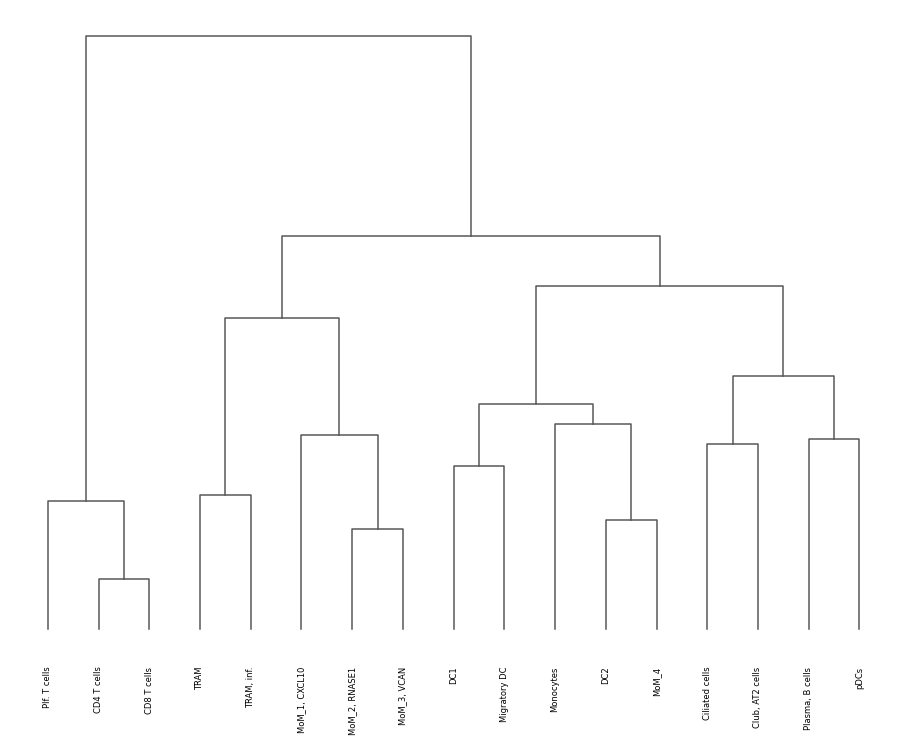

In [185]:
sc.tl.dendrogram(ds, groupby="cluster")
sc.pl.dendrogram(ds, groupby="cluster")

Recompute markers

In [187]:
sc.tl.rank_genes_groups(ds, "cluster", method="wilcoxon", n_genes=0)
new_markers = sc_utils.get_markers(ds, "cluster")

## More subclustering: AT1, AT2, Club cells, Tregs

First, look at high-resolution clustering again

../lib/sc_utils.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


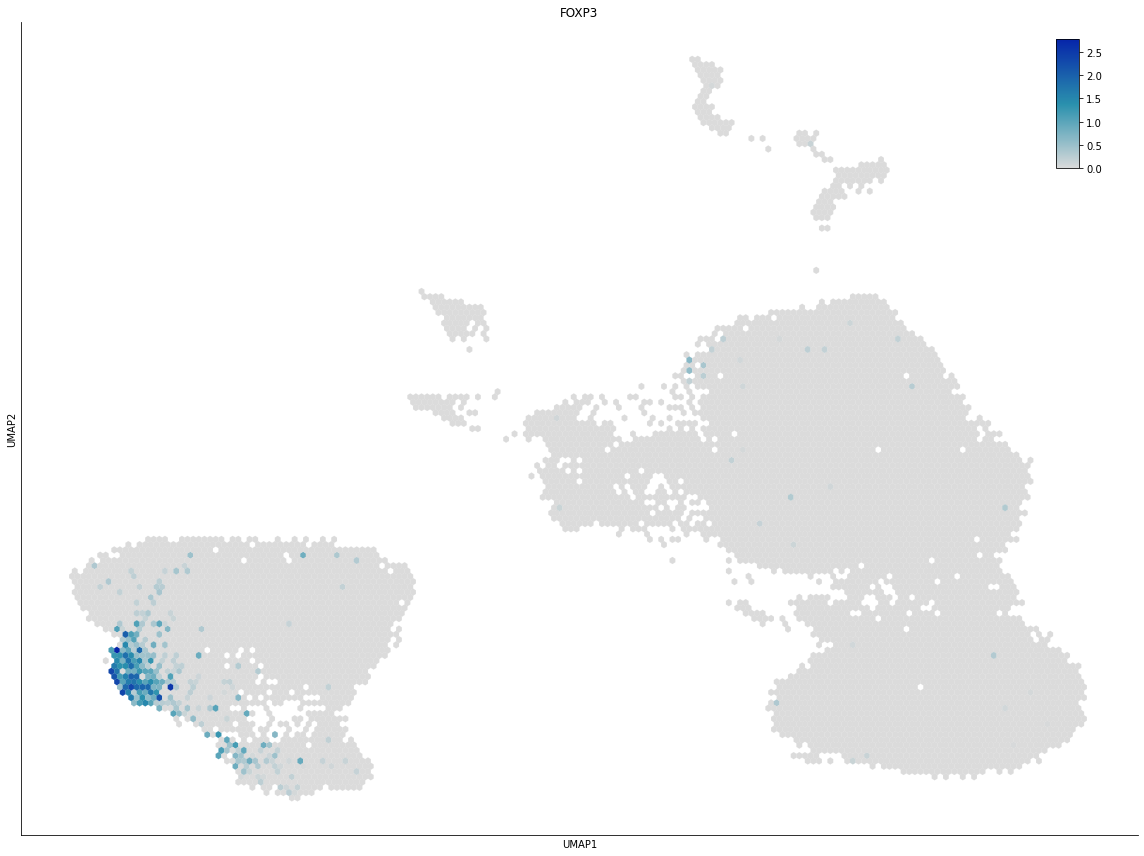

In [27]:
sc_utils.feature_plot(ds, "FOXP3");

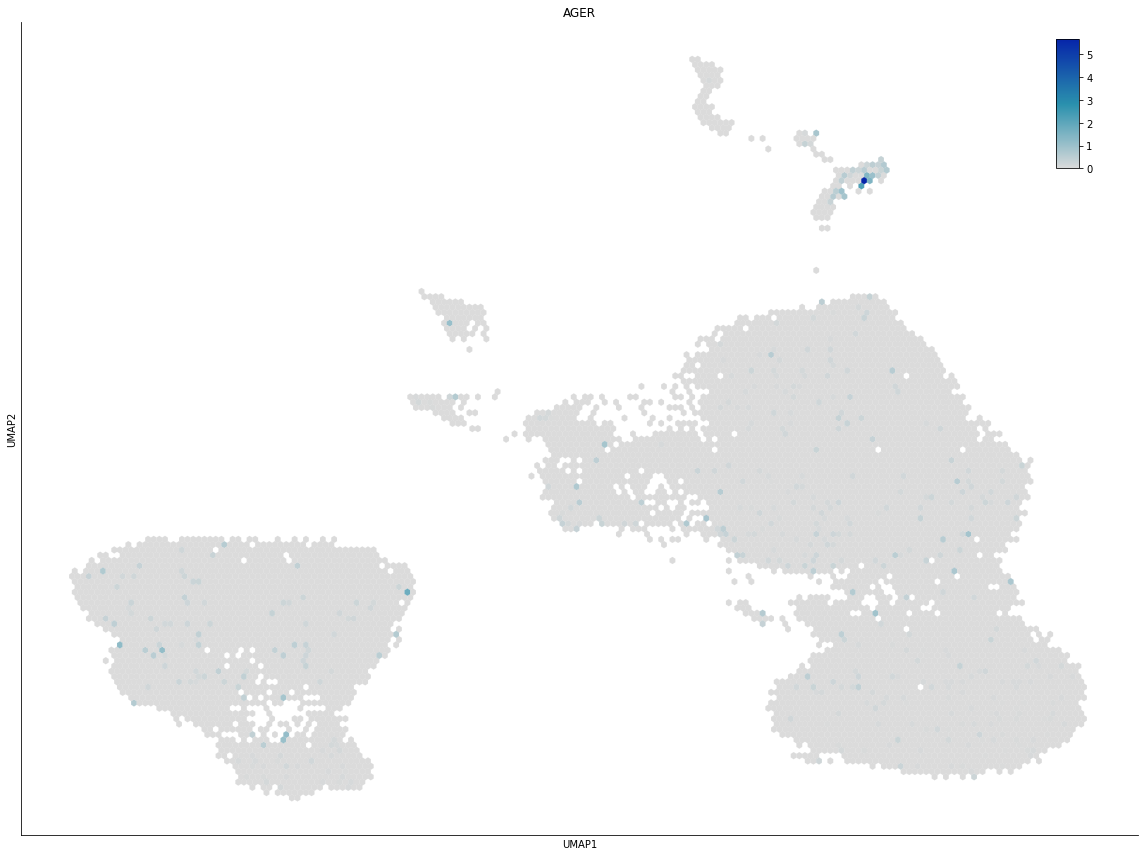

In [28]:
sc_utils.feature_plot(ds, "AGER");

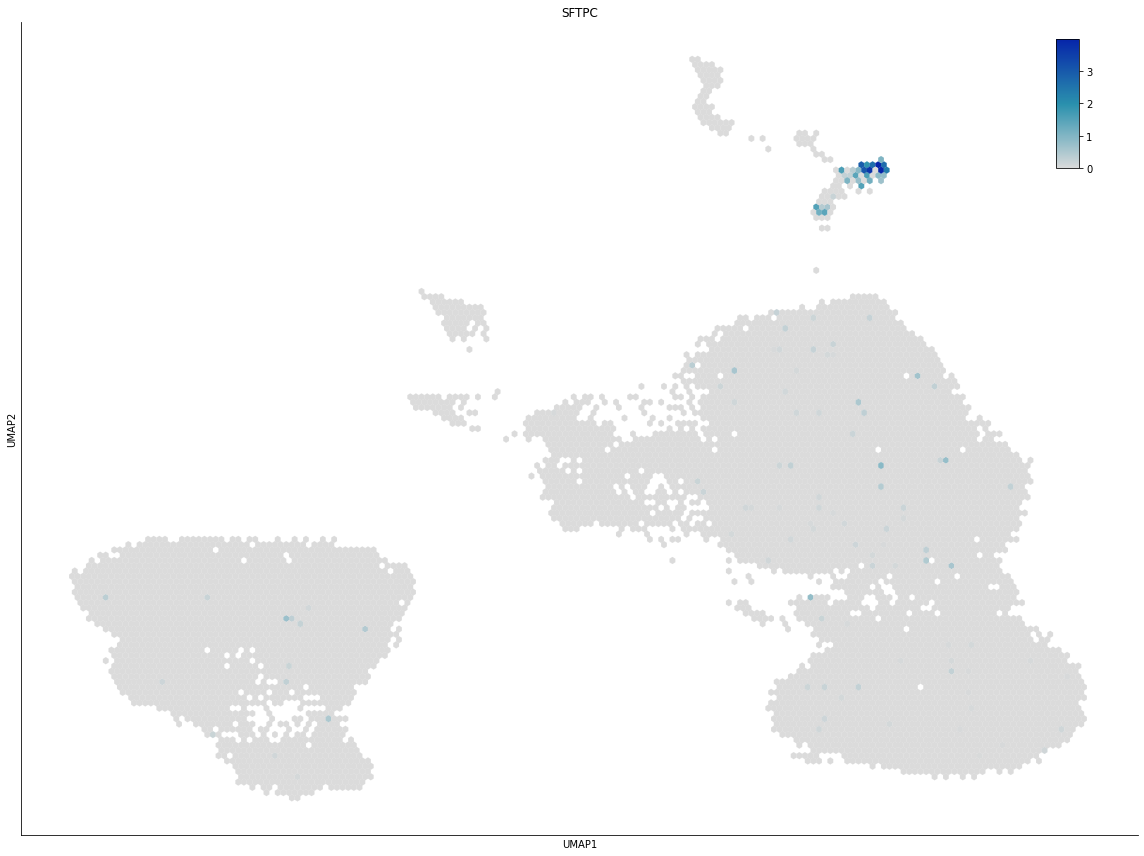

In [29]:
sc_utils.feature_plot(ds, "SFTPC");

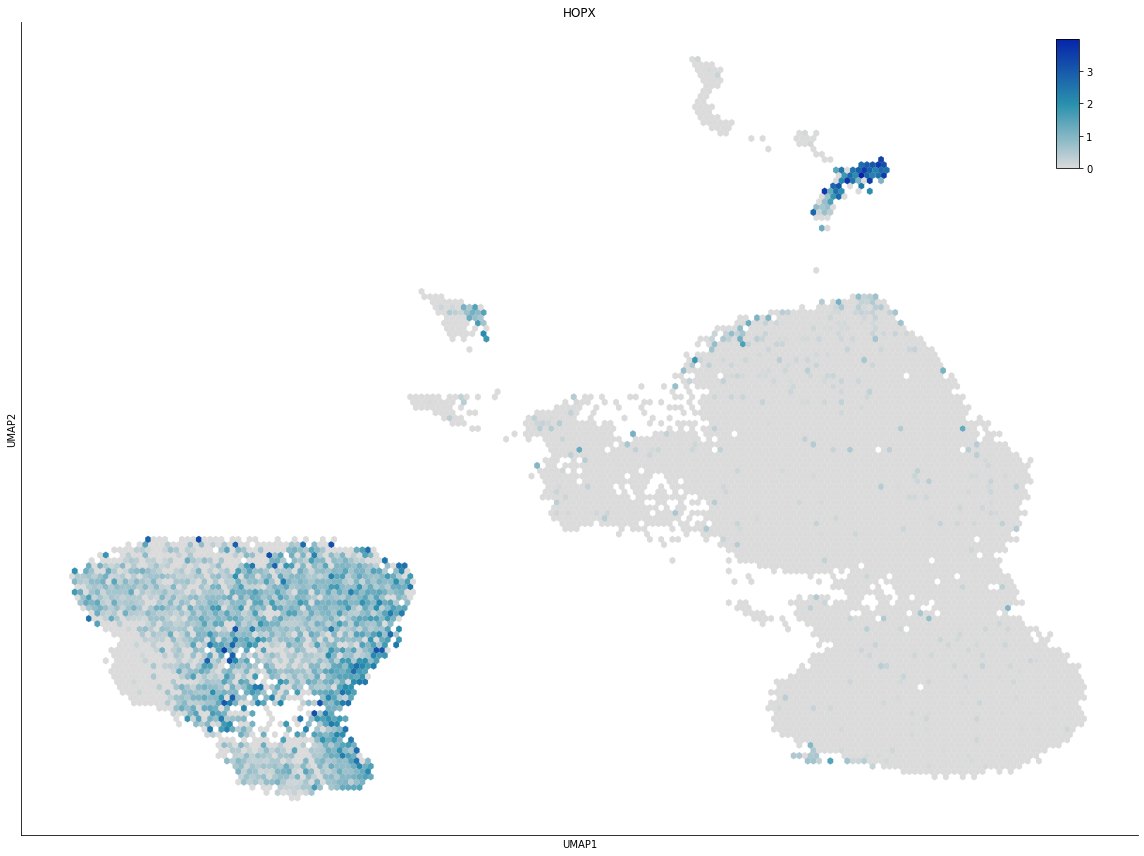

In [30]:
sc_utils.feature_plot(ds, "HOPX");

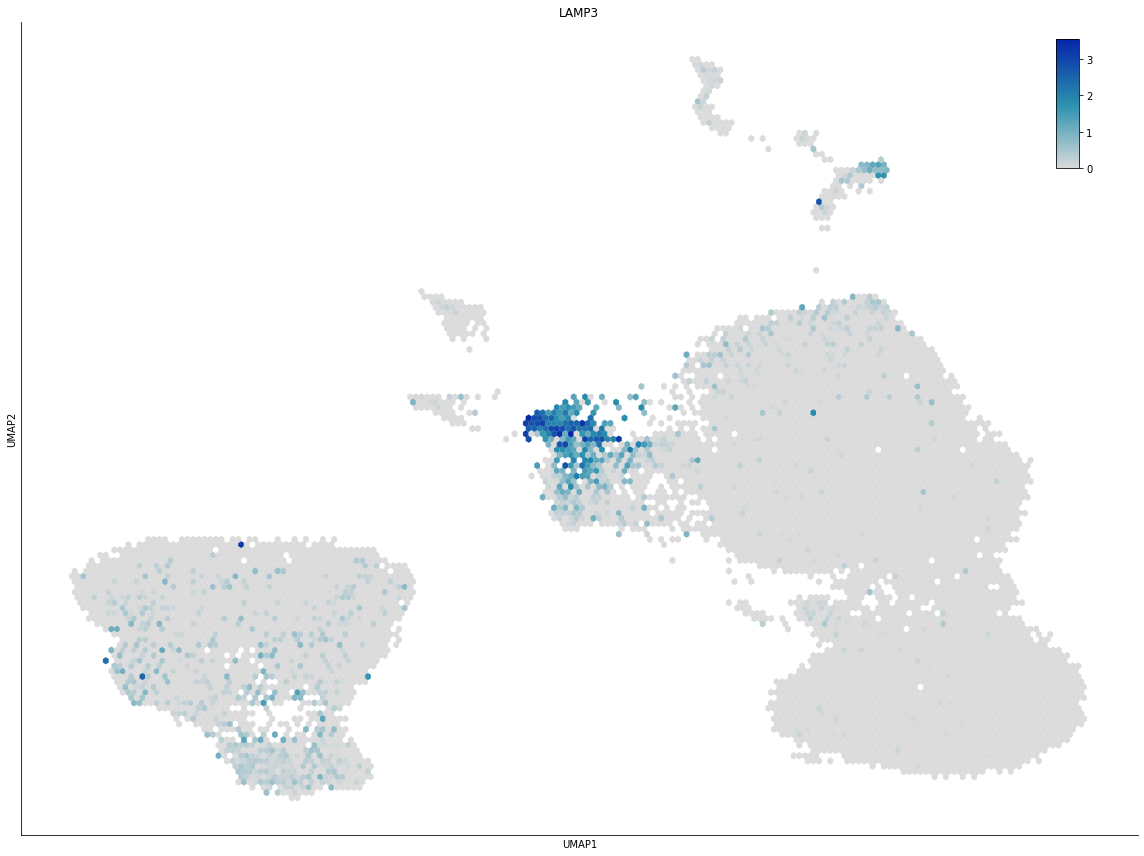

In [31]:
sc_utils.feature_plot(ds, "LAMP3");

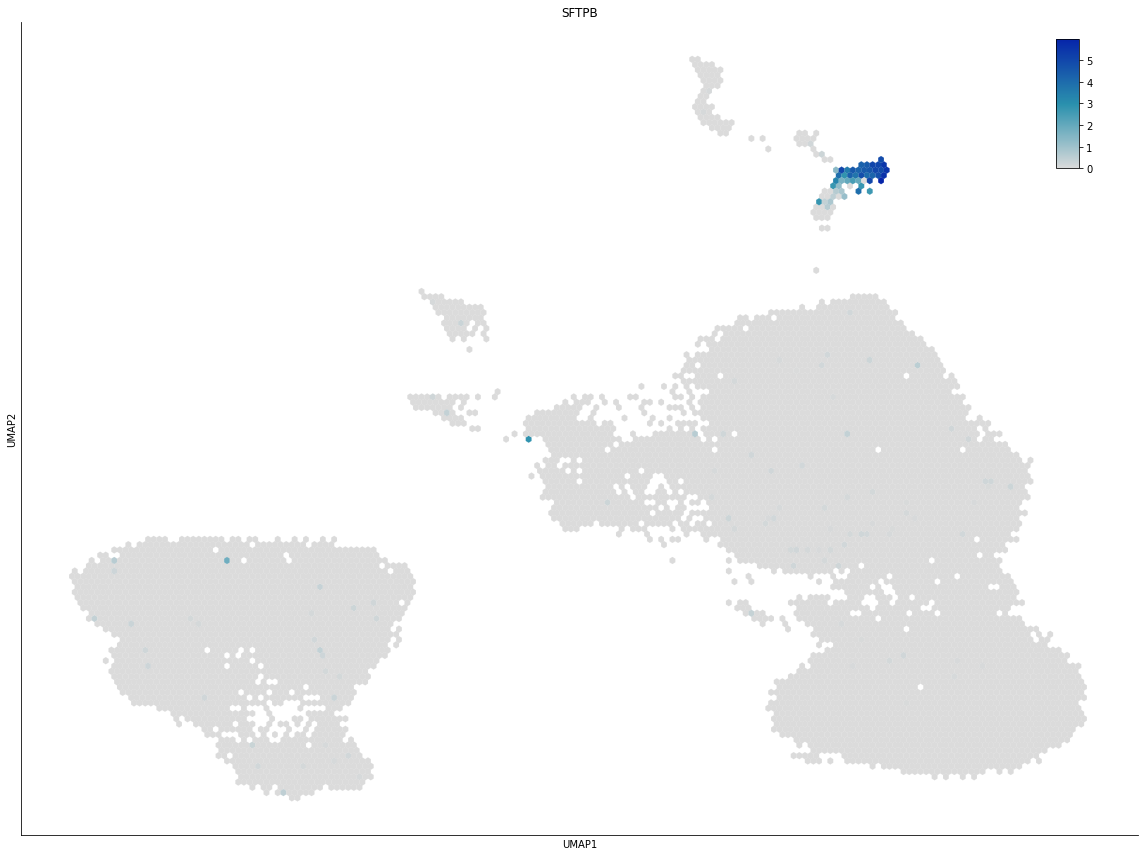

In [32]:
sc_utils.feature_plot(ds, "SFTPB");

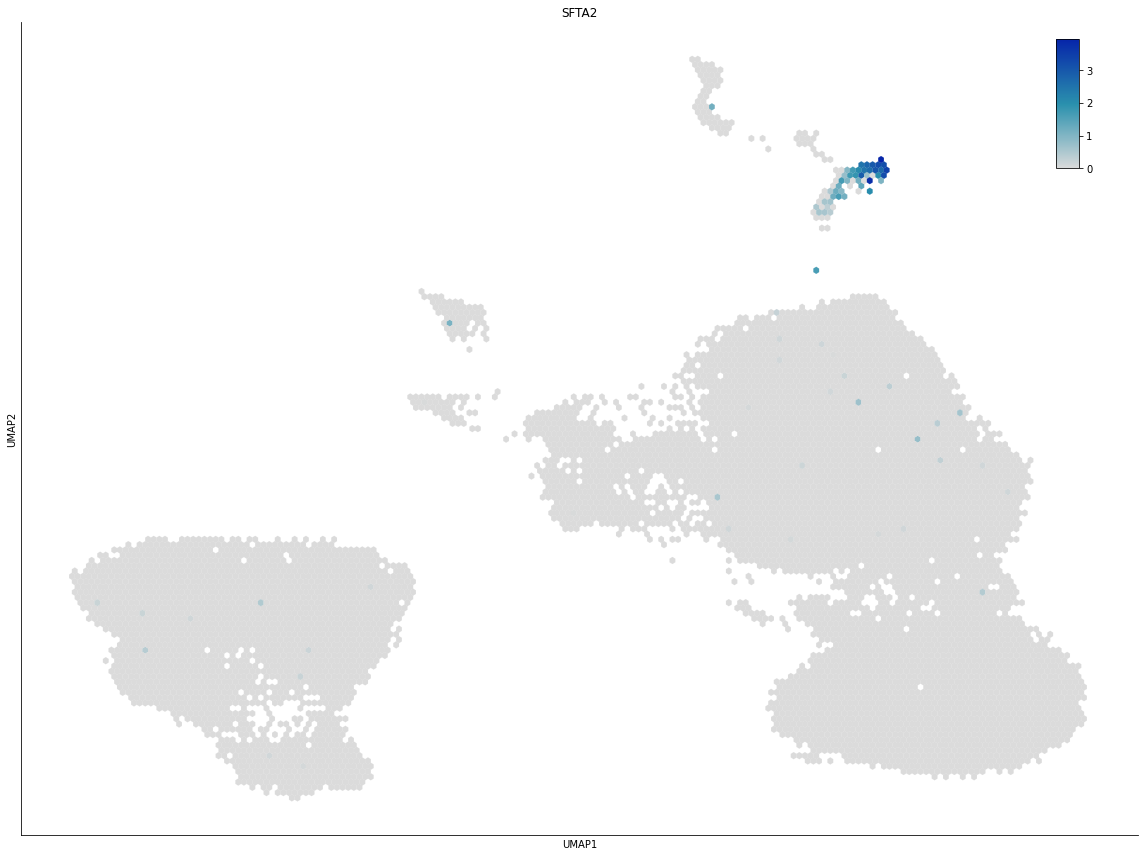

In [33]:
sc_utils.feature_plot(ds, "SFTA2");

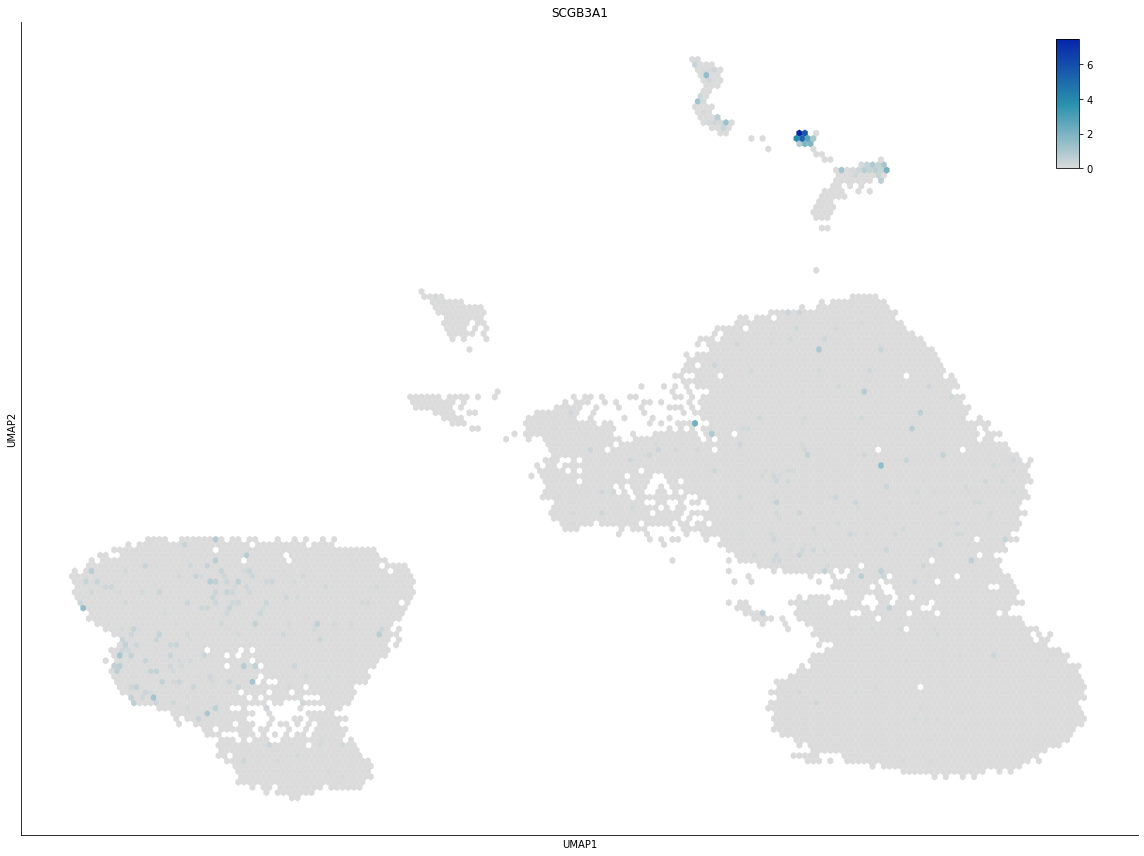

In [34]:
sc_utils.feature_plot(ds, "SCGB3A1");

Let's subset on T cells and on Club, AT2 cells and cluster them separately 

In [40]:
tcells = ds[ds.obs.cluster.isin(["CD4 T cells", "CD8 T cells", "Prolif. T cells"]), :].copy()

In [41]:
tcells.shape

(11423, 20128)

In [42]:
tcells = tcells.raw.to_adata()

In [43]:
sc.pp.highly_variable_genes(tcells, n_top_genes=1000, batch_key="orig.ident")

In [44]:
tcells.var.highly_variable[tcells.var_names.str.match("^SARS-CoV-2")] = False

/projects/b1038/Pulmonary/nmarkov/script/2020_Grant/single_cell_analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
tcells.var.highly_variable.sum()

988

In [46]:
tcells.raw = tcells

In [47]:
sc.pp.scale(tcells)
sc.tl.pca(tcells, svd_solver="arpack")

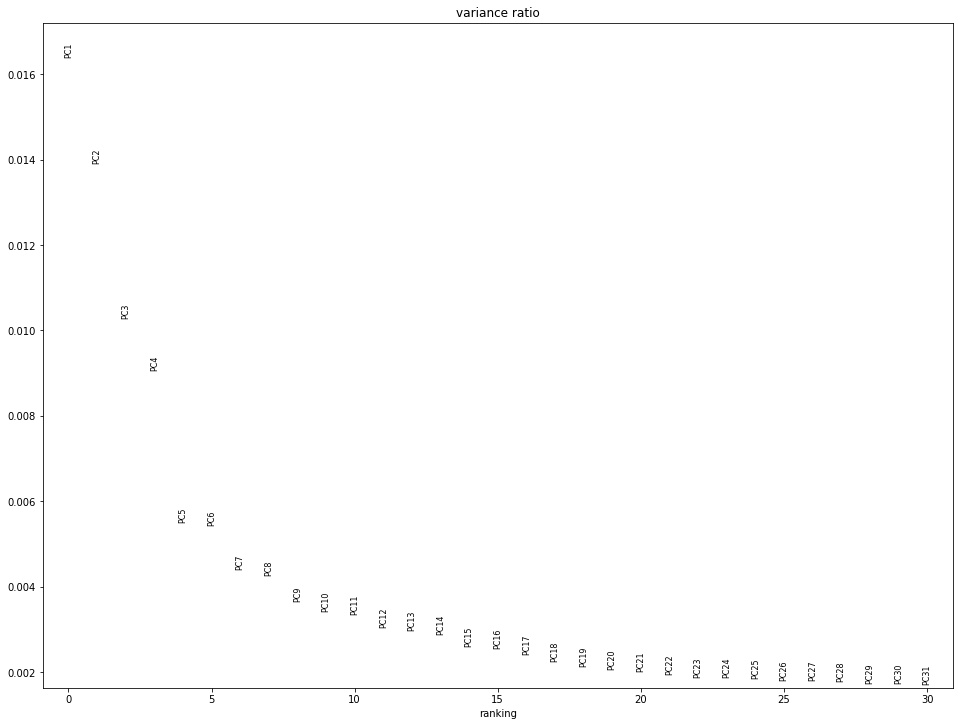

In [48]:
sc.pl.pca_variance_ratio(tcells)

In [49]:
bbknn.bbknn(tcells, neighbors_within_batch=int(50 / tcells.obs.batch.unique().size), n_pcs=30)

In [50]:
sc.tl.leiden(tcells, resolution=1)

In [51]:
sc.tl.umap(tcells)

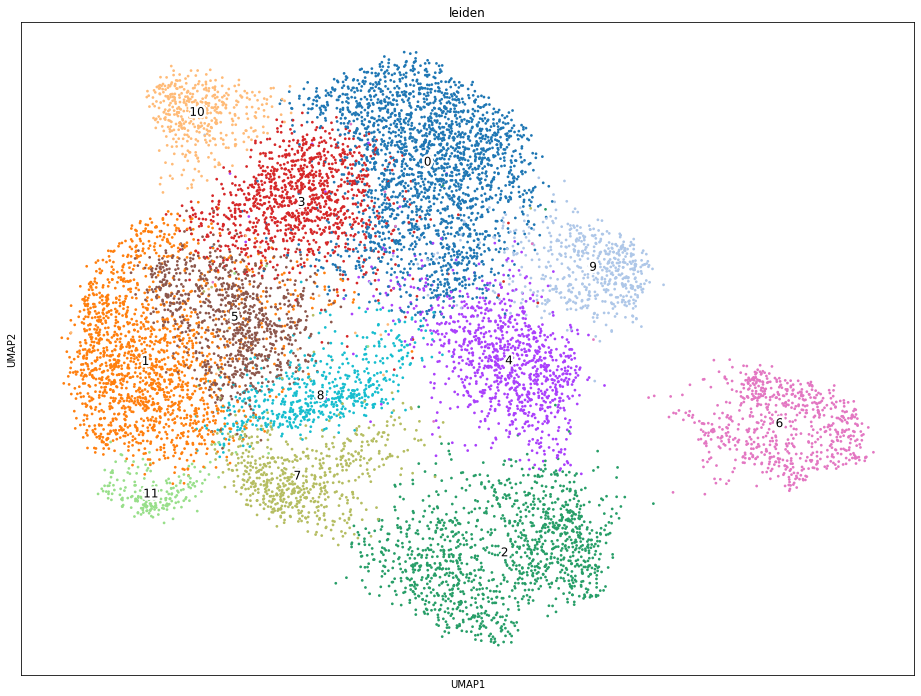

In [19]:
ax = sc.pl.umap(
    tcells, 
    color="leiden", 
    size=30, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

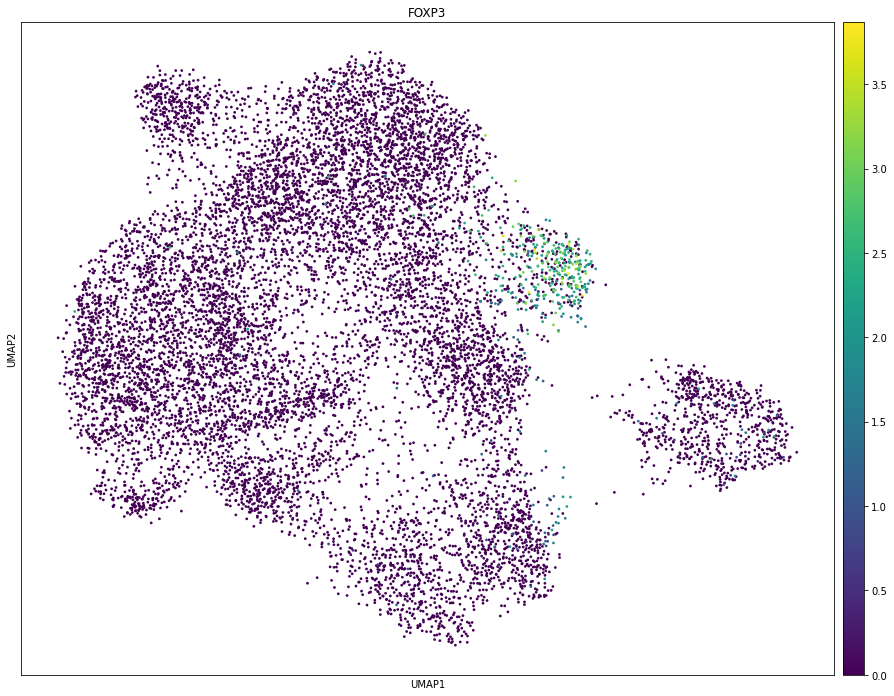

In [20]:
ax = sc.pl.umap(
    tcells, 
    color="FOXP3", 
    size=30, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

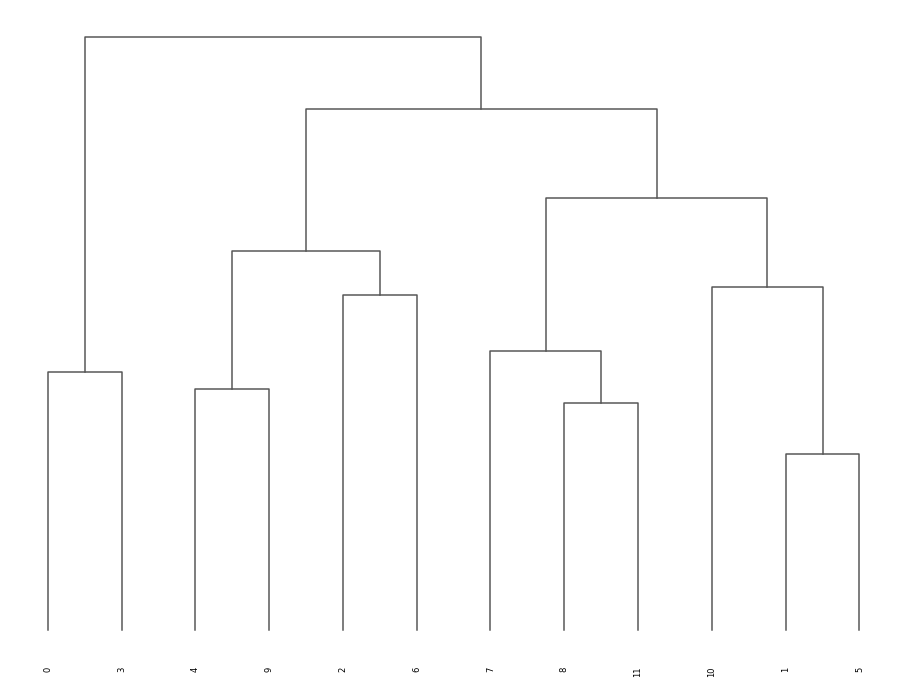

In [47]:
sc.tl.dendrogram(tcells, groupby="leiden")
sc.pl.dendrogram(tcells, groupby="leiden")

Take cluster 9 and name those cells Tregs

In [49]:
ds.obs.cluster = ds.obs.cluster.astype(str)
ds.obs.loc[tcells.obs_names[tcells.obs.leiden == "9"], "cluster"] = "Tregs"

Look at it

... storing 'cluster' as categorical


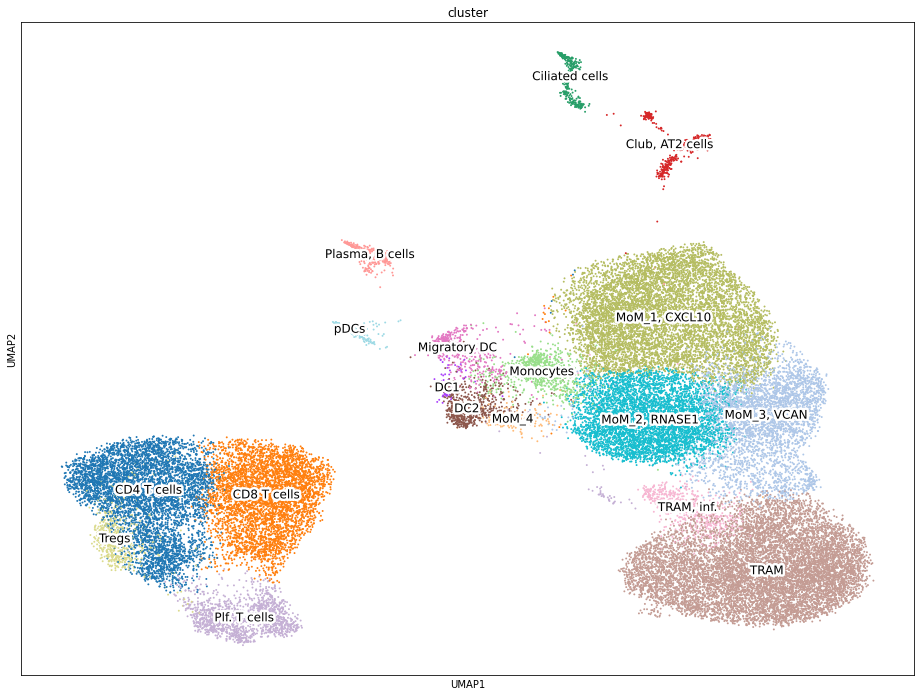

In [50]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

## Subclustering Proliferating T cells

In [7]:
plf_tcells = ds[ds.obs.cluster == "Prolif. T cells", :].copy()
plf_tcells.shape

(1423, 20128)

In [8]:
plf_tcells = plf_tcells.raw.to_adata()

In [9]:
sc.pp.highly_variable_genes(plf_tcells, n_top_genes=1000, batch_key="orig.ident")

In [10]:
plf_tcells.var.highly_variable[plf_tcells.var_names.str.match("^SARS-CoV-2")] = False

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
plf_tcells.var.highly_variable.sum()

997

In [12]:
plf_tcells.raw = plf_tcells
sc.pp.scale(plf_tcells)
sc.tl.pca(plf_tcells, svd_solver="arpack")

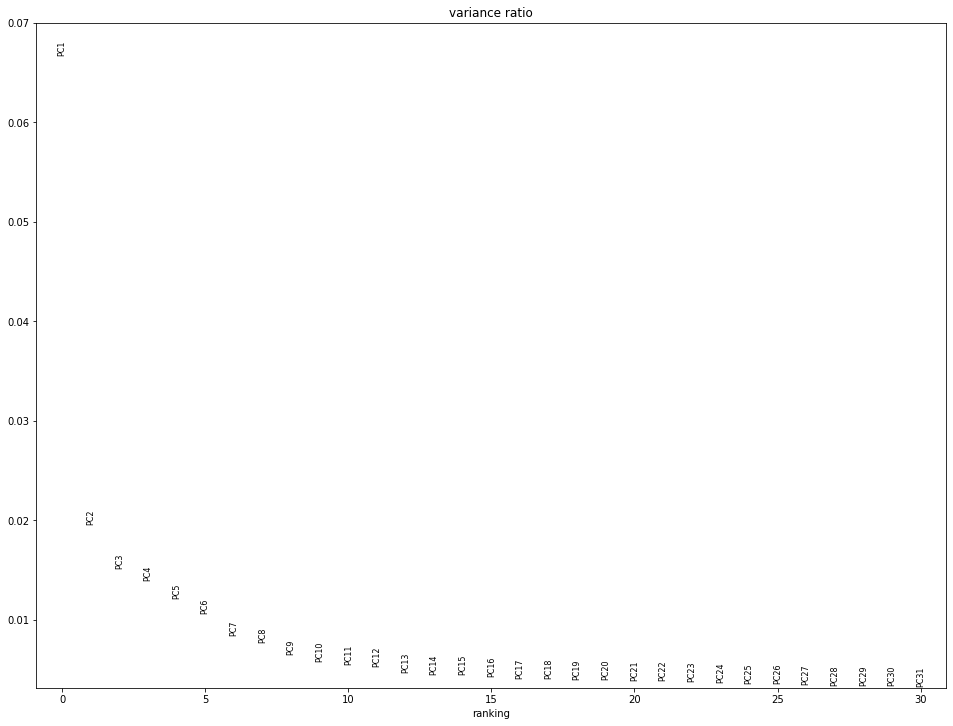

In [13]:
sc.pl.pca_variance_ratio(plf_tcells)

In [14]:
bbknn.bbknn(plf_tcells, neighbors_within_batch=int(20 / plf_tcells.obs.batch.unique().size), n_pcs=15)

In [15]:
sc.tl.leiden(plf_tcells, resolution=0.2)

In [16]:
sc.tl.umap(plf_tcells)

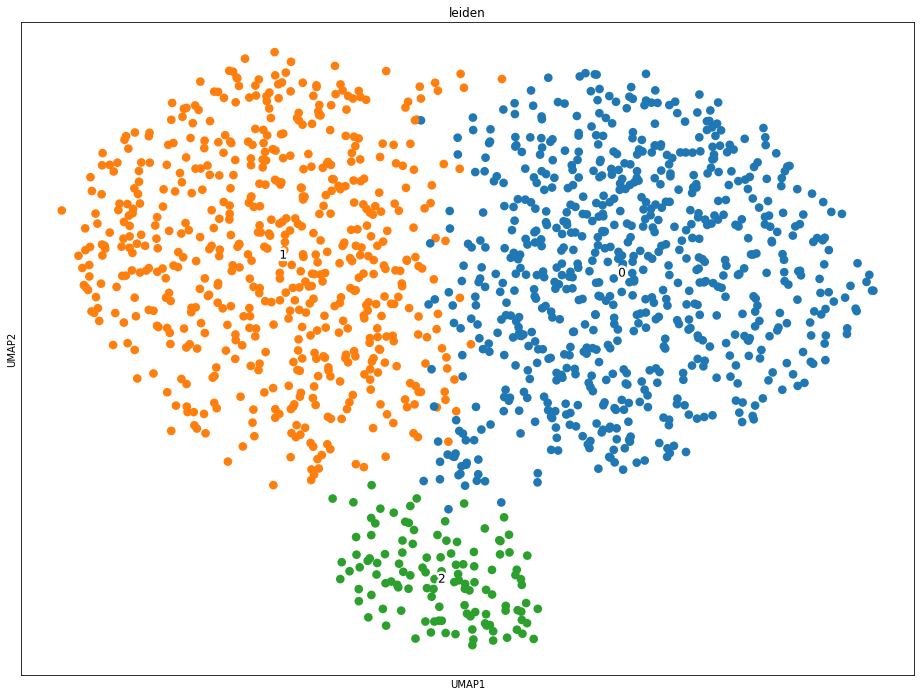

In [17]:
ax = sc.pl.umap(
    plf_tcells, 
    color="leiden", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

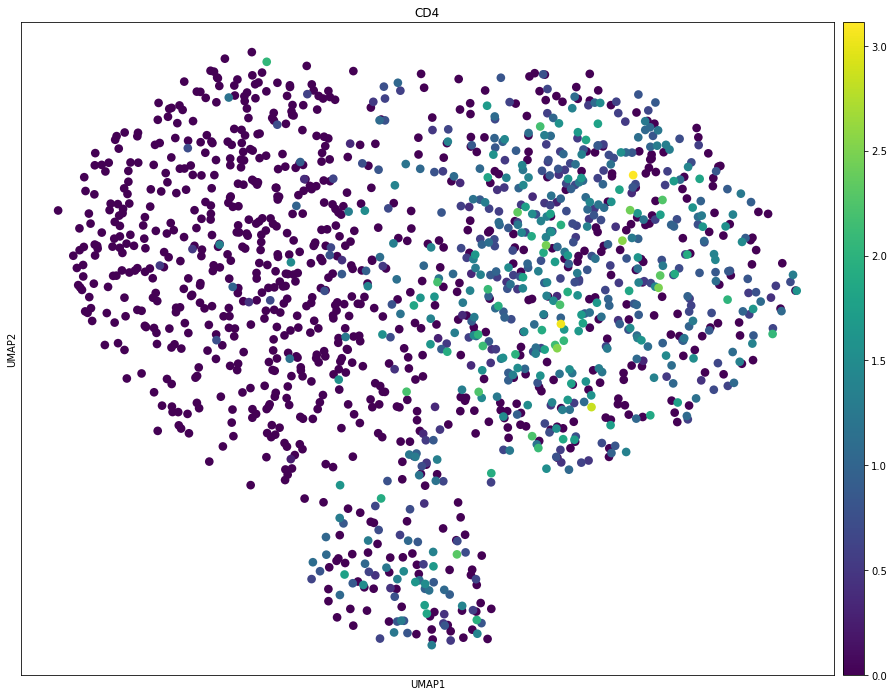

In [18]:
ax = sc.pl.umap(
    plf_tcells, 
    color="CD4", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

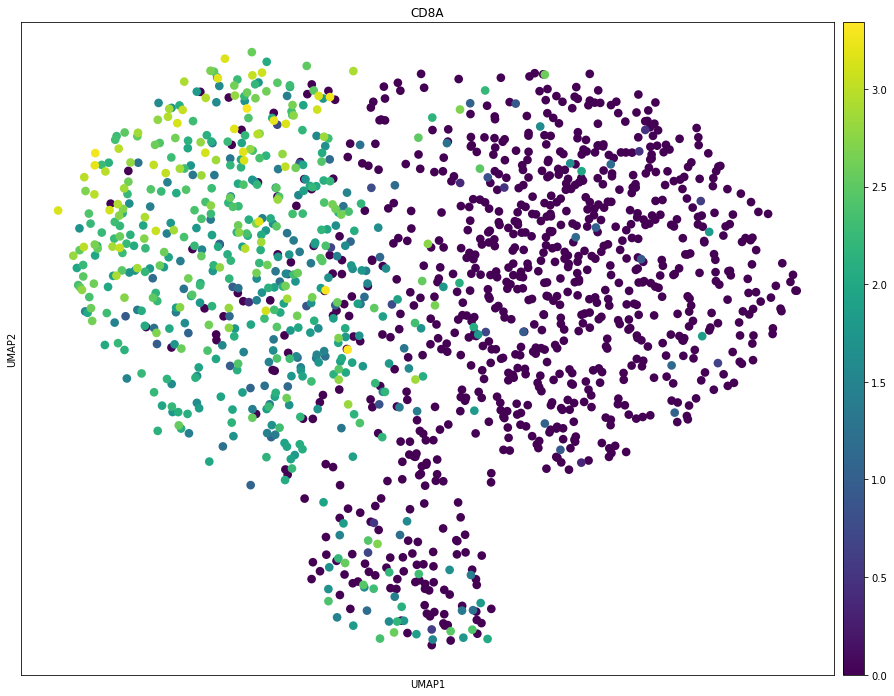

In [19]:
ax = sc.pl.umap(
    plf_tcells, 
    color="CD8A", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

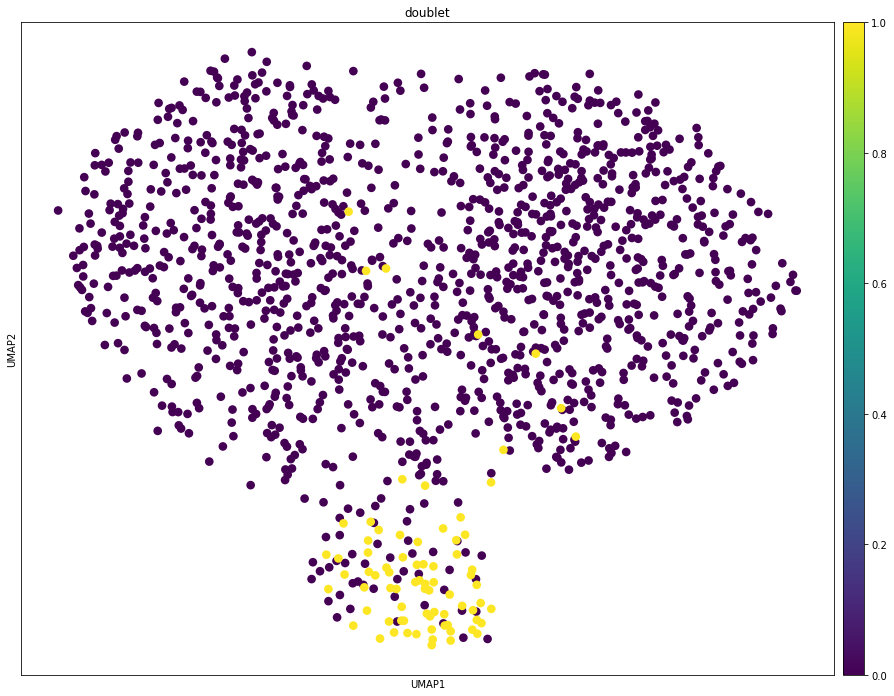

In [20]:
ax = sc.pl.umap(
    plf_tcells, 
    color="doublet", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [21]:
plf_tcells_names = pd.Series([
    "Plf. CD4 T cells",
    "Plf. CD8 T cells",
    "Plf. doublets"
])

In [22]:
plf_tcells.obs["cluster"] = plf_tcells_names[plf_tcells.obs.leiden.astype(int)].values

In [23]:
ds.obs.cluster = ds.obs.cluster.astype(str)

In [24]:
ds.obs.loc[plf_tcells.obs_names, "cluster"] = plf_tcells.obs.cluster

... storing 'cluster' as categorical


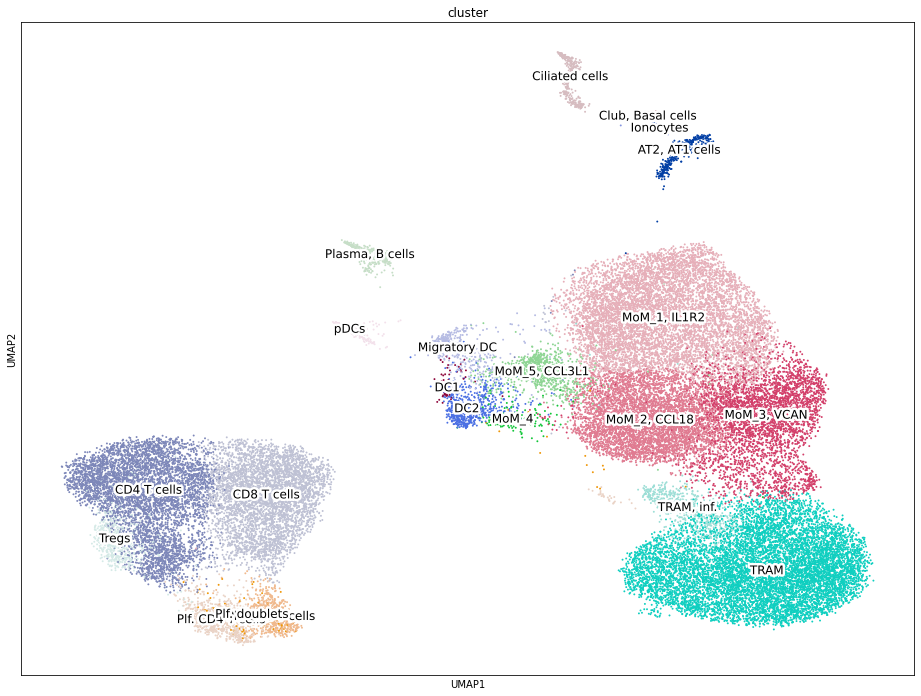

In [25]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

## Epithelial cells

In [6]:
ep = ds[ds.obs.cluster.isin(["Club, AT2 cells"]), :].copy()

In [15]:
ep.shape

(400, 20128)

In [16]:
ep = ep.raw.to_adata()

In [17]:
sc.pp.highly_variable_genes(ep, n_top_genes=1000, batch_key="orig.ident")

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/scanpy/preprocessing/_highly_variable_genes.py:84: RuntimeWarning: divide by zero encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


In [18]:
ep.var.highly_variable[ep.var_names.str.match("^SARS-CoV-2")] = False

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
ep.var.highly_variable.sum()

988

In [20]:
ep.raw = ep

In [21]:
sc.pp.scale(ep)
sc.tl.pca(ep, svd_solver="arpack")

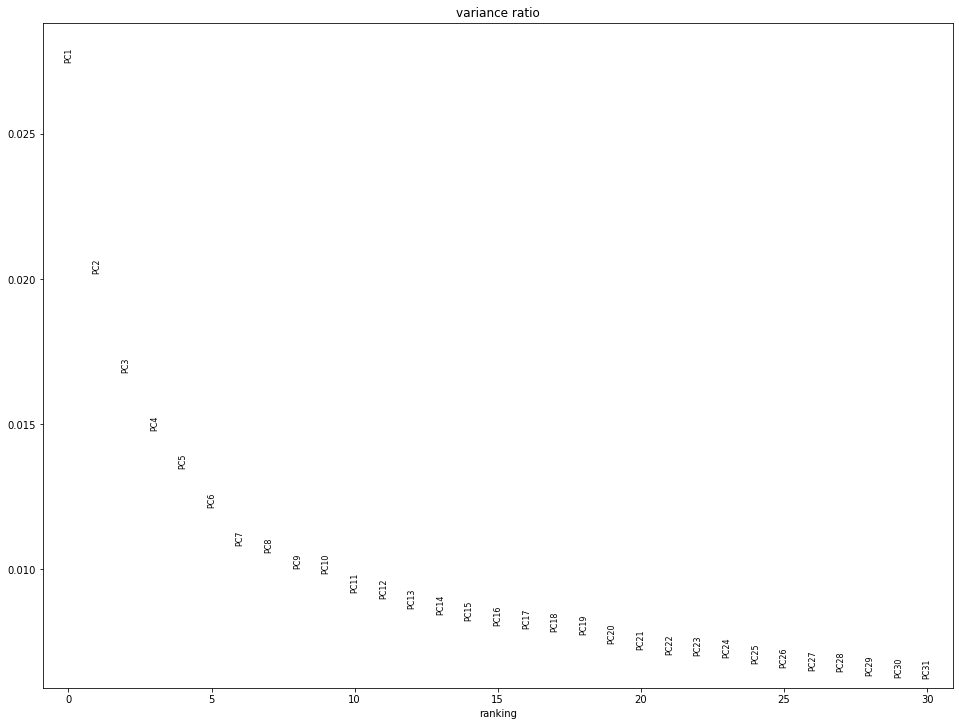

In [22]:
sc.pl.pca_variance_ratio(ep)

In [98]:
bbknn.bbknn(ep, neighbors_within_batch=int(20 / ep.obs.batch.unique().size), n_pcs=25)

In [99]:
sc.tl.leiden(ep, resolution=0.25)

In [100]:
sc.tl.umap(ep)

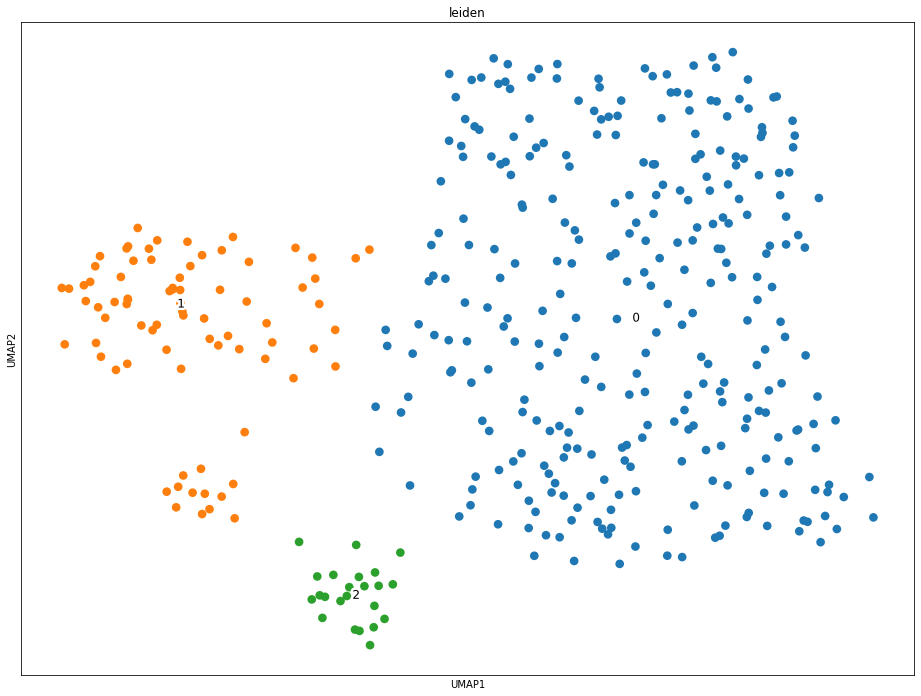

In [101]:
ax = sc.pl.umap(
    ep, 
    color="leiden", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

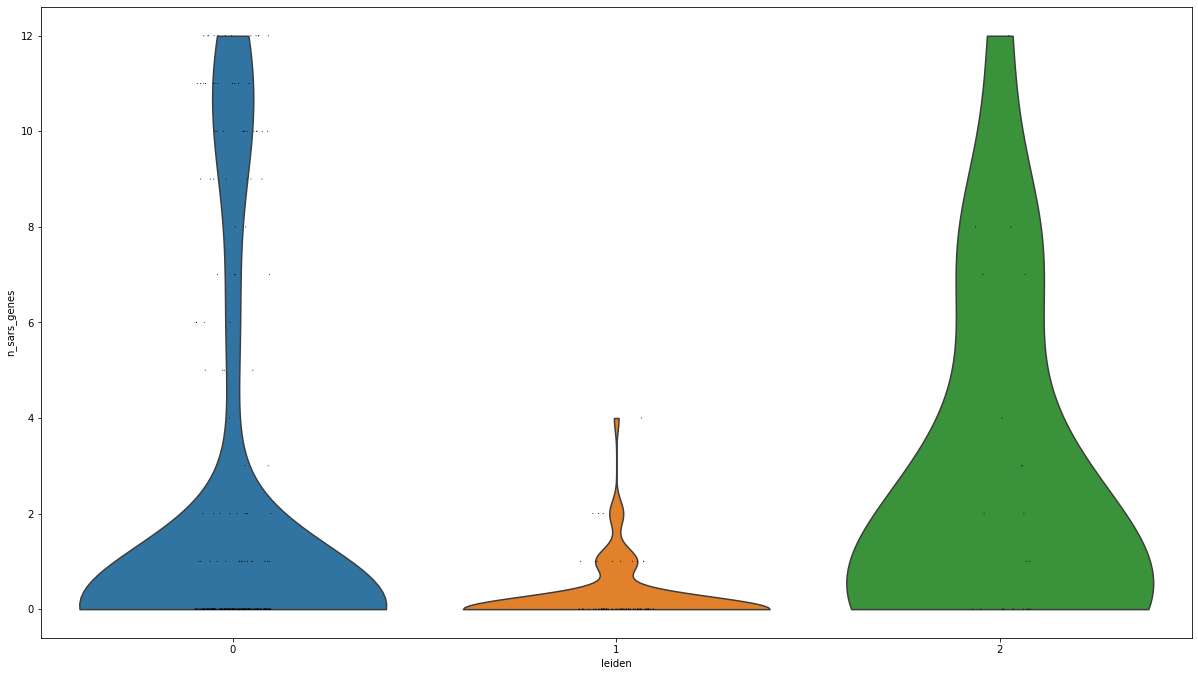

In [102]:
sc.pl.violin(ep, ["n_sars_genes"], groupby="leiden")

In [103]:
sc.tl.rank_genes_groups(ep, "leiden", method="wilcoxon", n_genes=0)
ep_markers = sc_utils.get_markers(ep, "leiden")

In [104]:
ep_markers.groupby("cluster").head(10)

p_val  avg_logFC     pct.1     pct.2     p_val_adj cluster  \
0      4.690167e-15   4.744986  0.627517  0.068627  4.690167e-15       0   
1      3.160991e-12   5.058760  0.550336  0.078431  3.160991e-12       0   
2      2.641019e-11   3.718006  0.577181  0.088235  2.641019e-11       0   
3      6.376165e-11   4.610205  0.540268  0.068627  6.376165e-11       0   
4      9.142070e-11   3.537046  0.567114  0.107843  9.142070e-11       0   
5      5.868276e-10   4.153436  0.523490  0.058824  5.868276e-10       0   
6      5.071641e-09   2.756398  0.516779  0.205882  5.071641e-09       0   
7      8.203764e-09   3.207847  0.493289  0.137255  8.203764e-09       0   
8      1.697339e-08   1.423629  0.721477  0.382353  1.697339e-08       0   
9      2.159677e-08   1.562349  0.657718  0.264706  2.159677e-08       0   
20128  1.748041e-18   6.479128  0.734177  0.021807  1.748041e-18       1   
20129  4.626917e-18   5.092479  0.822785  0.355140  4.626917e-18       1   
20130  4.626917e-18   8.277521  0.708861  0.021807  4.626917e-18       1   
20131  4.626917e-18   6.909668  0.708861  0.012461  4.626917e-18       1   
20132  7.955603e-18   4.574336  0.759494  0.124611  7.955603e-18       1   
20133  8.471953e-17   2.875082  0.949367  0.535826  8.471953e-17       1   
20134  5.165392e-16   2.783248  0.962025  0.507788  5.165392e-16       1   
20135  1.087913e-15   3.913291  0.822785  0.395639  1.087913e-15       1   
20136  3.618552e-15   2.643876  0.949367  0.489097  3.618552e-15       1   
20137  9.446986e-15   2.799720  0.936709  0.526480  9.446986e-15       1   
40256  1.315350e-09   6.487837  0.956522  0.119363  1.315350e-09       2   
40257  1.121093e-07   5.310130  0.913043  0.114058  1.121093e-07       2   
40258  1.363964e-07   5.947057  0.869565  0.145889  1.363964e-07       2   
40259  1.534197e-07   3.434783  1.000000  0.387268  1.534197e-07       2   
40260  2.906634e-07   6.796811  0.826087  0.037135  2.906634e-07       2   
40261  5.247678e-07   5.855138  0.826087  0.053050  5.247678e-07       2   
40262  1.136282e-06   4.201500  0.869565  0.310345  1.136282e-06       2   
40263  1.353410e-06   3.211782  0.913043  0.424403  1.353410e-06       2   
40264  2.226917e-06   4.681394  0.826087  0.106101  2.226917e-06       2   
40265  3.040836e-06   3.574342  0.869565  0.339523  3.040836e-06       2   

            gene  
0           HOPX  
1          SFTPB  
2         TM4SF1  
3          NAPSA  
4      TNFRSF12A  
5          SFTA2  
6            JUN  
7       PPP1R15A  
8           EIF1  
9         SQSTM1  
20128      MUC16  
20129       SLPI  
20130   SERPINB3  
20131      CHST9  
20132     PRSS23  
20133     MT-CO1  
20134     MT-CO3  
20135      WFDC2  
20136    MT-ATP6  
20137     MT-CO2  
40256     TYROBP  
40257       SRGN  
40258     FCER1G  
40259       GLUL  
40260       SPI1  
40261      CD163  
40262       CTSL  
40263       CTSB  
40264     LAPTM5  
40265       CYBA

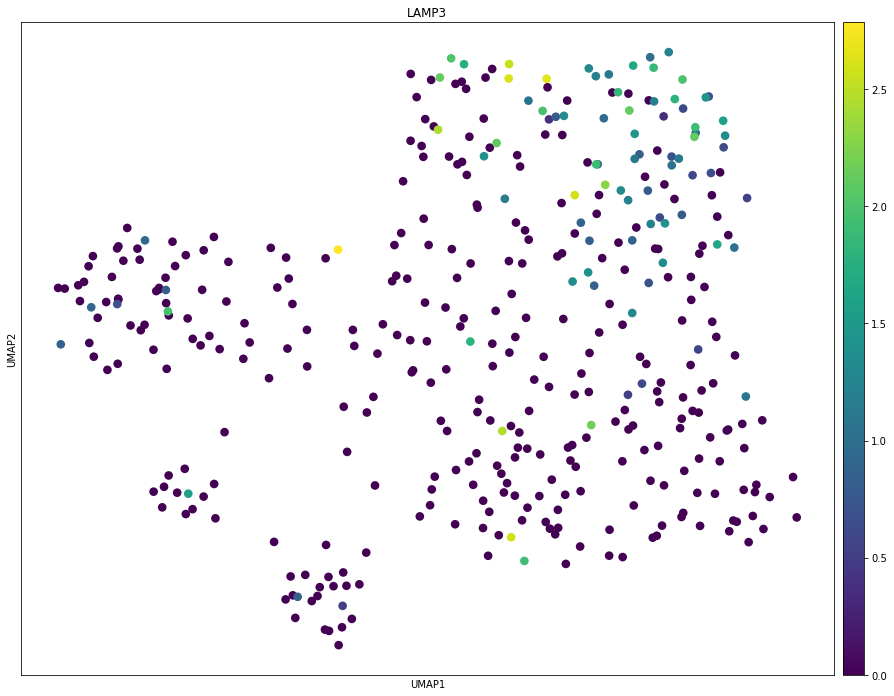

In [119]:
ax = sc.pl.umap(
    ep, 
    color="LAMP3", 
    size=300, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [120]:
ep_names = pd.Series([
    "AT2 cells",
    "Basal cells",
    "MoM_5"
])

In [122]:
ep.obs["cluster"] = ep_names[ep.obs.leiden.astype(int)].values

In [123]:
ds.obs.cluster = ds.obs.cluster.astype(str)

In [124]:
ds.obs.loc[ep.obs_names, "cluster"] = ep.obs.cluster

... storing 'cluster' as categorical


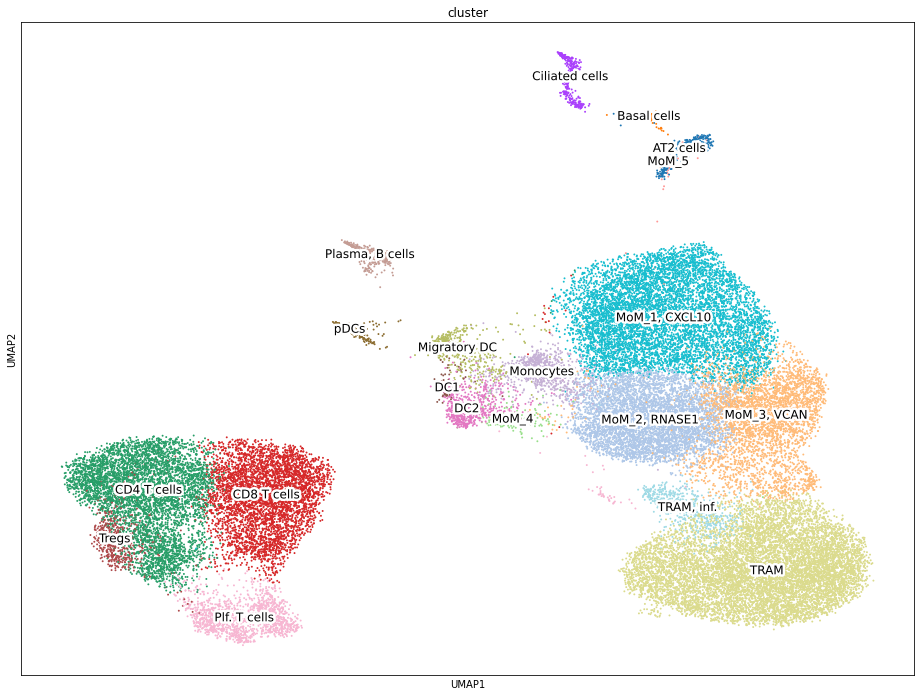

In [125]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

Ok, switching to manual operation mode for those epithelial cells

In [75]:
ionocytes = """Sample_2_ACGCCGATCTCTTGAT-1
Sample_2_CATGGCGCAACACGCC-1
Sample_2_TGCTGCTAGCTGCAAG-1
Sample_2_TGGTTCCCAGTATGCT-1
Sample_2_TTCTTAGAGTAATCCC-1
Sample_3_GTTCGGGTCAAGGCTT-2
Sample_3_GTTCTCGCAAAGAATC-2
Sample_4_CGTGTCTGTAGCGTAG-3
Sample_5_AAGCCGCTCAGCTGGC-4
Sample_5_CGAATGTTCTCGCATC-4
Sample_5_TACTTGTTCTTCGAGA-4
Sample_5_TTCTACATCACAGTAC-4
Sample_6_CCAATCCGTCCTCTTG-5
Sample_6_GTAACGTGTAAAGTCA-5""".split("\n")

In [77]:
club_basal = """Sample_1_AACTTTCGTTGAGGTG-0
Sample_1_AGCGTATGTTAAAGTG-0
Sample_1_AGGTCCGGTTCAGACT-0
Sample_1_CACTCCAGTTAAAGAC-0
Sample_1_CATTATCTCAATAAGG-0
Sample_1_CCACCTATCATGTCCC-0
Sample_1_CTAGAGTAGCTCCCAG-0
Sample_1_CTAGAGTAGGAGTACC-0
Sample_1_GATCTAGCAAAGGCGT-0
Sample_1_GCATGATTCATCTGCC-0
Sample_1_GTCGTAACAAGTTGTC-0
Sample_1_TGCCAAATCTGGTTCC-0
Sample_1_TTCTACAAGCGAAGGG-0
Sample_2_ACTGAACAGACAATAC-1
Sample_2_AGAGCTTCACGAAATA-1
Sample_2_CGAGAAGAGTAGATGT-1
Sample_2_CGGACGTAGACGCTTT-1
Sample_2_CTGATAGTCGGCGCTA-1
Sample_2_GTCGGGTAGCGTTCCG-1
Sample_2_GTTACAGAGTGTCTCA-1
Sample_2_GTTCATTCACGACGAA-1
Sample_2_TAAGCGTCACAACTGT-1
Sample_2_TACGGATTCTAACTCT-1
Sample_3_AACACGTTCTAACGGT-2
Sample_3_AAGACCTTCGTCCGTT-2
Sample_3_ACACCCTAGAATTGTG-2
Sample_3_ACAGCCGAGAAACCGC-2
Sample_3_ACATCAGAGTGCGATG-2
Sample_3_ACTGATGGTAGCAAAT-2
Sample_3_AGTCTTTGTTCTGTTT-2
Sample_3_CCAATCCGTAAGAGAG-2
Sample_3_GAAACTCGTCCTAGCG-2
Sample_3_TCGGTAAAGACTTGAA-2
Sample_3_TTAGGACAGACAGAGA-2
Sample_3_TTTACTGCATAGTAAG-2
Sample_4_AACCATGTCAGCCTAA-3
Sample_4_AAGGAGCCATTTCAGG-3
Sample_4_AGCGTATGTAGGGTAC-3
Sample_4_AGGCCACAGCGTCTAT-3
Sample_4_ATCCACCAGTGAACGC-3
Sample_4_ATGAGGGAGCCAGGAT-3
Sample_4_CAGCTGGTCGTCTGAA-3
Sample_4_CATATGGAGTGGTAGC-3
Sample_4_CATCAGATCCAACCAA-3
Sample_4_CATCGAAGTGTTAAGA-3
Sample_4_CCAATCCTCTCTGCTG-3
Sample_4_CCATTCGAGAAACGCC-3
Sample_4_CCTATTAGTCGAATCT-3
Sample_4_CGTCTACGTGTGGCTC-3
Sample_4_CTCAGAATCCAAGCCG-3
Sample_4_GCAGTTATCCATGAGT-3
Sample_4_GTCCTCATCTTAACCT-3
Sample_4_TACTCGCCAATCTACG-3
Sample_4_TCGCGAGTCTTCTGGC-3
Sample_4_TTGGCAACAGCCTTGG-3
Sample_5_AACTCTTAGTAGGCCA-4
Sample_5_CGATGGCGTCCGACGT-4
Sample_5_CTACACCCATGCCTAA-4
Sample_5_GCGCGATTCTATGTGG-4
Sample_5_GGTGTTACATCCGCGA-4
Sample_5_TACCTTACAAGTAATG-4
Sample_6_ATCTGCCCACTACAGT-5
Sample_6_CCCAATCGTTAGAACA-5
Sample_6_CCTAAAGTCTGGTATG-5
Sample_6_CGACTTCTCGAATGCT-5
Sample_6_CGAGCCATCGGCTACG-5
Sample_6_GACGCGTCACGAAAGC-5
Sample_6_GCGCAACGTTGATTCG-5
Sample_6_GGACAAGAGACGCACA-5
Sample_6_GTGCAGCGTTCCACTC-5
Sample_6_TACCTATAGGCGACAT-5
Sample_6_TCACAAGTCTCAAGTG-5
Sample_6_TCGAGGCTCTCAACTT-5""".split("\n")

In [26]:
ep.obs.cluster = ep.obs.cluster.astype(str)

In [28]:
ep.obs.cluster = "AT2, AT1 cells"

In [29]:
ep.obs.loc[ionocytes, "cluster"] = "Ionocytes"

In [30]:
ep.obs.loc[club_basal, "cluster"] = "Club, Basal cells"

In [34]:
ds.obs.cluster = ds.obs.cluster.astype(str)

In [35]:
ds.obs.loc[ep.obs_names, "cluster"] = ep.obs.cluster

In [36]:
ds.obs.cluster = ds.obs.cluster.replace("Monocytes", "MoM_5")

... storing 'cluster' as categorical


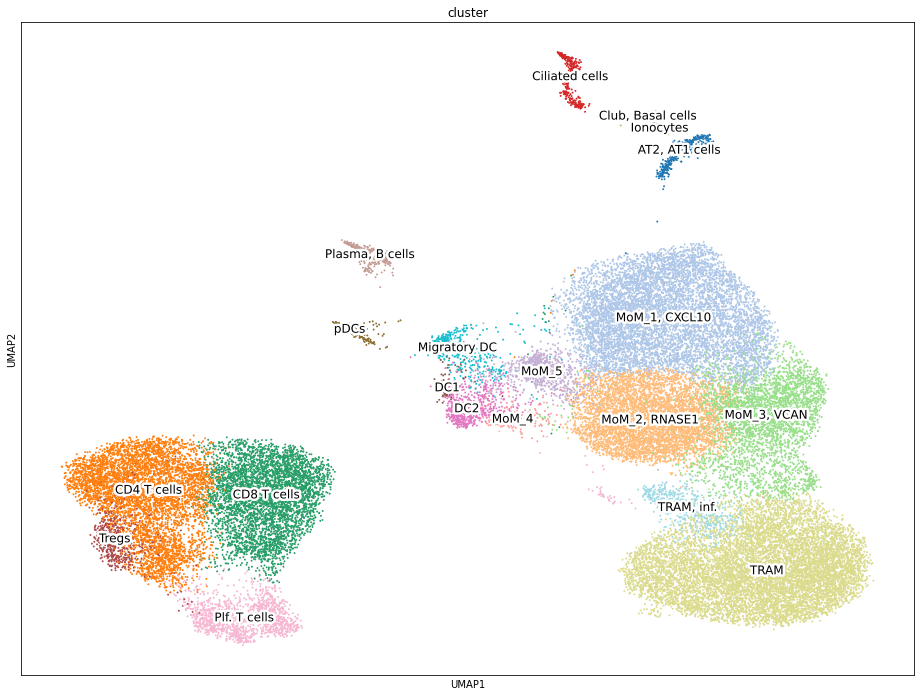

In [37]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

## Rename couple of clusters

In [41]:
ds.obs.cluster = ds.obs.cluster.astype(str)

In [43]:
ds.obs.cluster.replace("MoM_2, RNASE1", "MoM_2, CCL18", inplace=True)

In [44]:
ds.obs.cluster.replace("MoM_1, CXCL10", "MoM_1, IL1R2", inplace=True)

In [45]:
ds.obs.cluster.replace("MoM_5", "MoM_5, CCL3L1", inplace=True)

In [38]:
sc.tl.rank_genes_groups(ds, "cluster", method="wilcoxon", n_genes=0)
new_markers = sc_utils.get_markers(ds, "cluster")

Add gene module scores

In [79]:
ifn_response_genes = {
    "HALLMARK_INTERFERON_ALPHA_RESPONSE": "IFNA Response",
    "HALLMARK_INTERFERON_GAMMA_RESPONSE": "IFNG Response"
}

In [80]:
for k, v in ifn_response_genes.items():
    genes = pd.read_table(f"{k}.txt", skiprows=2, header=None)
    sc.tl.score_genes(ds, genes[0], ctrl_size=genes.size, score_name=v)

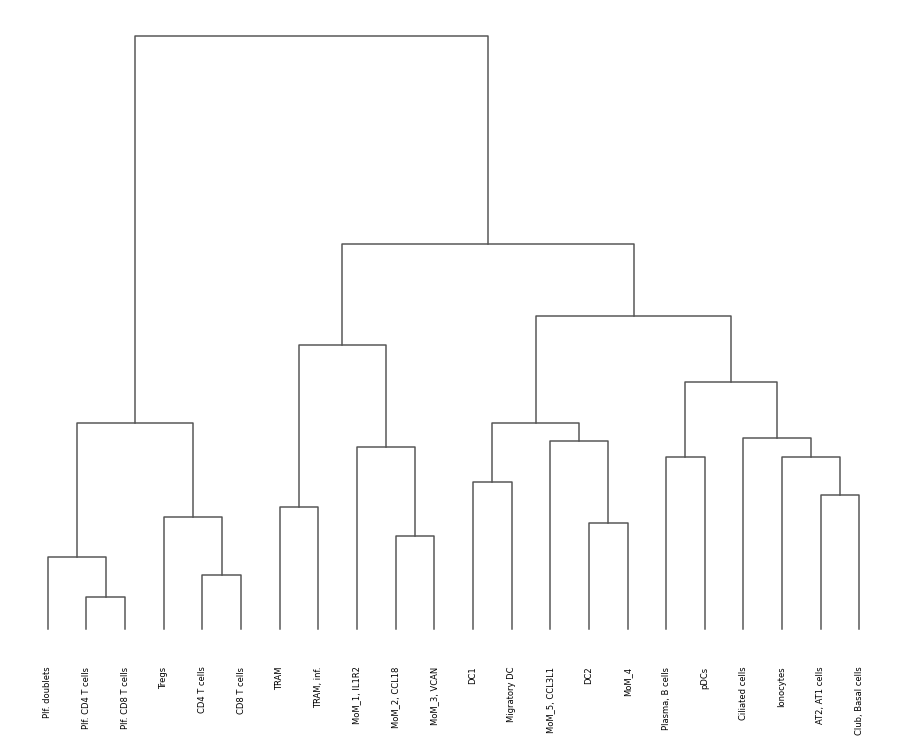

In [111]:
sc.tl.dendrogram(ds, groupby="cluster")
sc.pl.dendrogram(ds, groupby="cluster")

Add COVID-19

In [28]:
ds.obs["COVID-19"] = True

In [29]:
ds.obs.loc[ds.obs.patient == "6", "COVID-19"] = False

Remove doublets and save as object 10

In [31]:
ds10 = ds[ds.obs.doublet == False, :]
ds10 = ds10[ds10.obs.cluster != "Plf. doublets", :]
ds10.obs.drop(columns=["doublet"], inplace=True)
ds10.write_h5ad("../data/02preprint/10obj-named.h5ad")

In [108]:
sc.tl.rank_genes_groups(ds10, "cluster", method="wilcoxon", n_genes=0)
markers10 = sc_utils.get_markers(ds10, "cluster")

In [113]:
markers10.to_csv("../data/02preprint/10obj-markers.csv")

Remove non-COVID patient and save

In [ ]:
ds_covid = ds10[ds10.obs.patient != "6", :].copy()

In [ ]:
sc.pp.highly_variable_genes(ds_covid, n_top_genes=4000, batch_key="orig.ident")

In [ ]:
ds_covid.var.highly_variable[ds_covid.var_names.str.match("^SARS-CoV-2")] = False

In [ ]:
ds_covid.raw = ds_covid

In [ ]:
sc.pp.scale(ds_covid)
sc.tl.pca(ds_covid, svd_solver="arpack")

In [ ]:
bbknn.bbknn(ds_covid, neighbors_within_batch=int(100 / ds_covid.obs.batch.unique().size), n_pcs=25)

In [ ]:
sc.tl.umap(ds_covid)

In [ ]:
ds_covid = ds_covid[~ds_covid.obs.cluster.isin(["MoM_4", "MoM_5, CCL3L1"]), :].copy()

In [ ]:
ds_covid.write_h5ad("../data/02preprint/10obj-covid.h5ad")